# Load Imports, Dependencies, and Globals
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import importlib
import tools.dataset_manager as dataset_manager
import tools.pltw as pltw
import tools.processing_utils as processing_utils
import tools.feature_extraction_utils as feature_extraction_utils
import tools.time_domain_utils as time_domain_utils
import tools.statistical_utils as statistical_utils
import tools.dataset_utils as dataset_utils

def reload_modules():
    importlib.reload(pltw)
    importlib.reload(dataset_utils)
    importlib.reload(dataset_manager)
    importlib.reload(feature_extraction_utils)
    importlib.reload(time_domain_utils)
    importlib.reload(statistical_utils)
    importlib.reload(processing_utils)


# Roadmap
---

## Exploration and Discovery

- Basics, No. Moves/Processes/Solutions/Machines
- Process Sizes/Mean/Distr, Distr of req, Freq of moves vs Size
- Machine Capacities, Distr of capacities
- Moves; Total, Per solution, Per process
- Avg Target Machine capacity
- Avg % of available/taken capacity

---

## Feature Extraction

- Based on the plots, which process assignments are destroyed?
- What are the source machine capacities?
- What are the target machine capacities?


# 1 / Exploration
---

In [5]:
reload_modules()


In [6]:
dataset = dataset_manager.ReassignmentsDataset(dataset_fraction=0.25)


Loading 206485 entries frm dataset: /home/pbiel/repos/mrp/analysis/datasets/jask_a12/sol_partial.csv.
Sampled dataset to 51621 entries.
Completed loading dataset.


In [7]:
dataset.metadata()


>>> Basic Metadata >>>
Total Moves: 51621
Total Processes: 877
Total Machines: 100
Total Solutions: 192
Total Services: 858
>>> Process Sizes >>>
Process Sizes Shape: (51621,)
Process Sizes: [4825692 2657077 2657077 2094658 1971024 1971024 2698809 2698809 1754515
 1754515]...
Process size - Max: 4825692, Min: 3244
>>> Move Cost Distribution Stats >>>
Move Costs Shape: (51621,)
Move Cost Improvement Shape: (51621,)


In [9]:
total_process_moves = len(dataset.move_id)
unique_processes = np.unique(dataset.ps_id)
total_processes = len(unique_processes)

print(f"Total Moves: {total_process_moves}, Unique Processes: {total_processes}")


Total Moves: 51621, Unique Processes: 877


multiplot - Using 2 ydata series with plot_kwargs_list: [{'marker': 'o', 'color': 'b', 'ptype': 'scatter'}, {'marker': 'x', 'color': 'r', 'label': 'Process mean size: 413232.73', 'linestyle': '--'}]


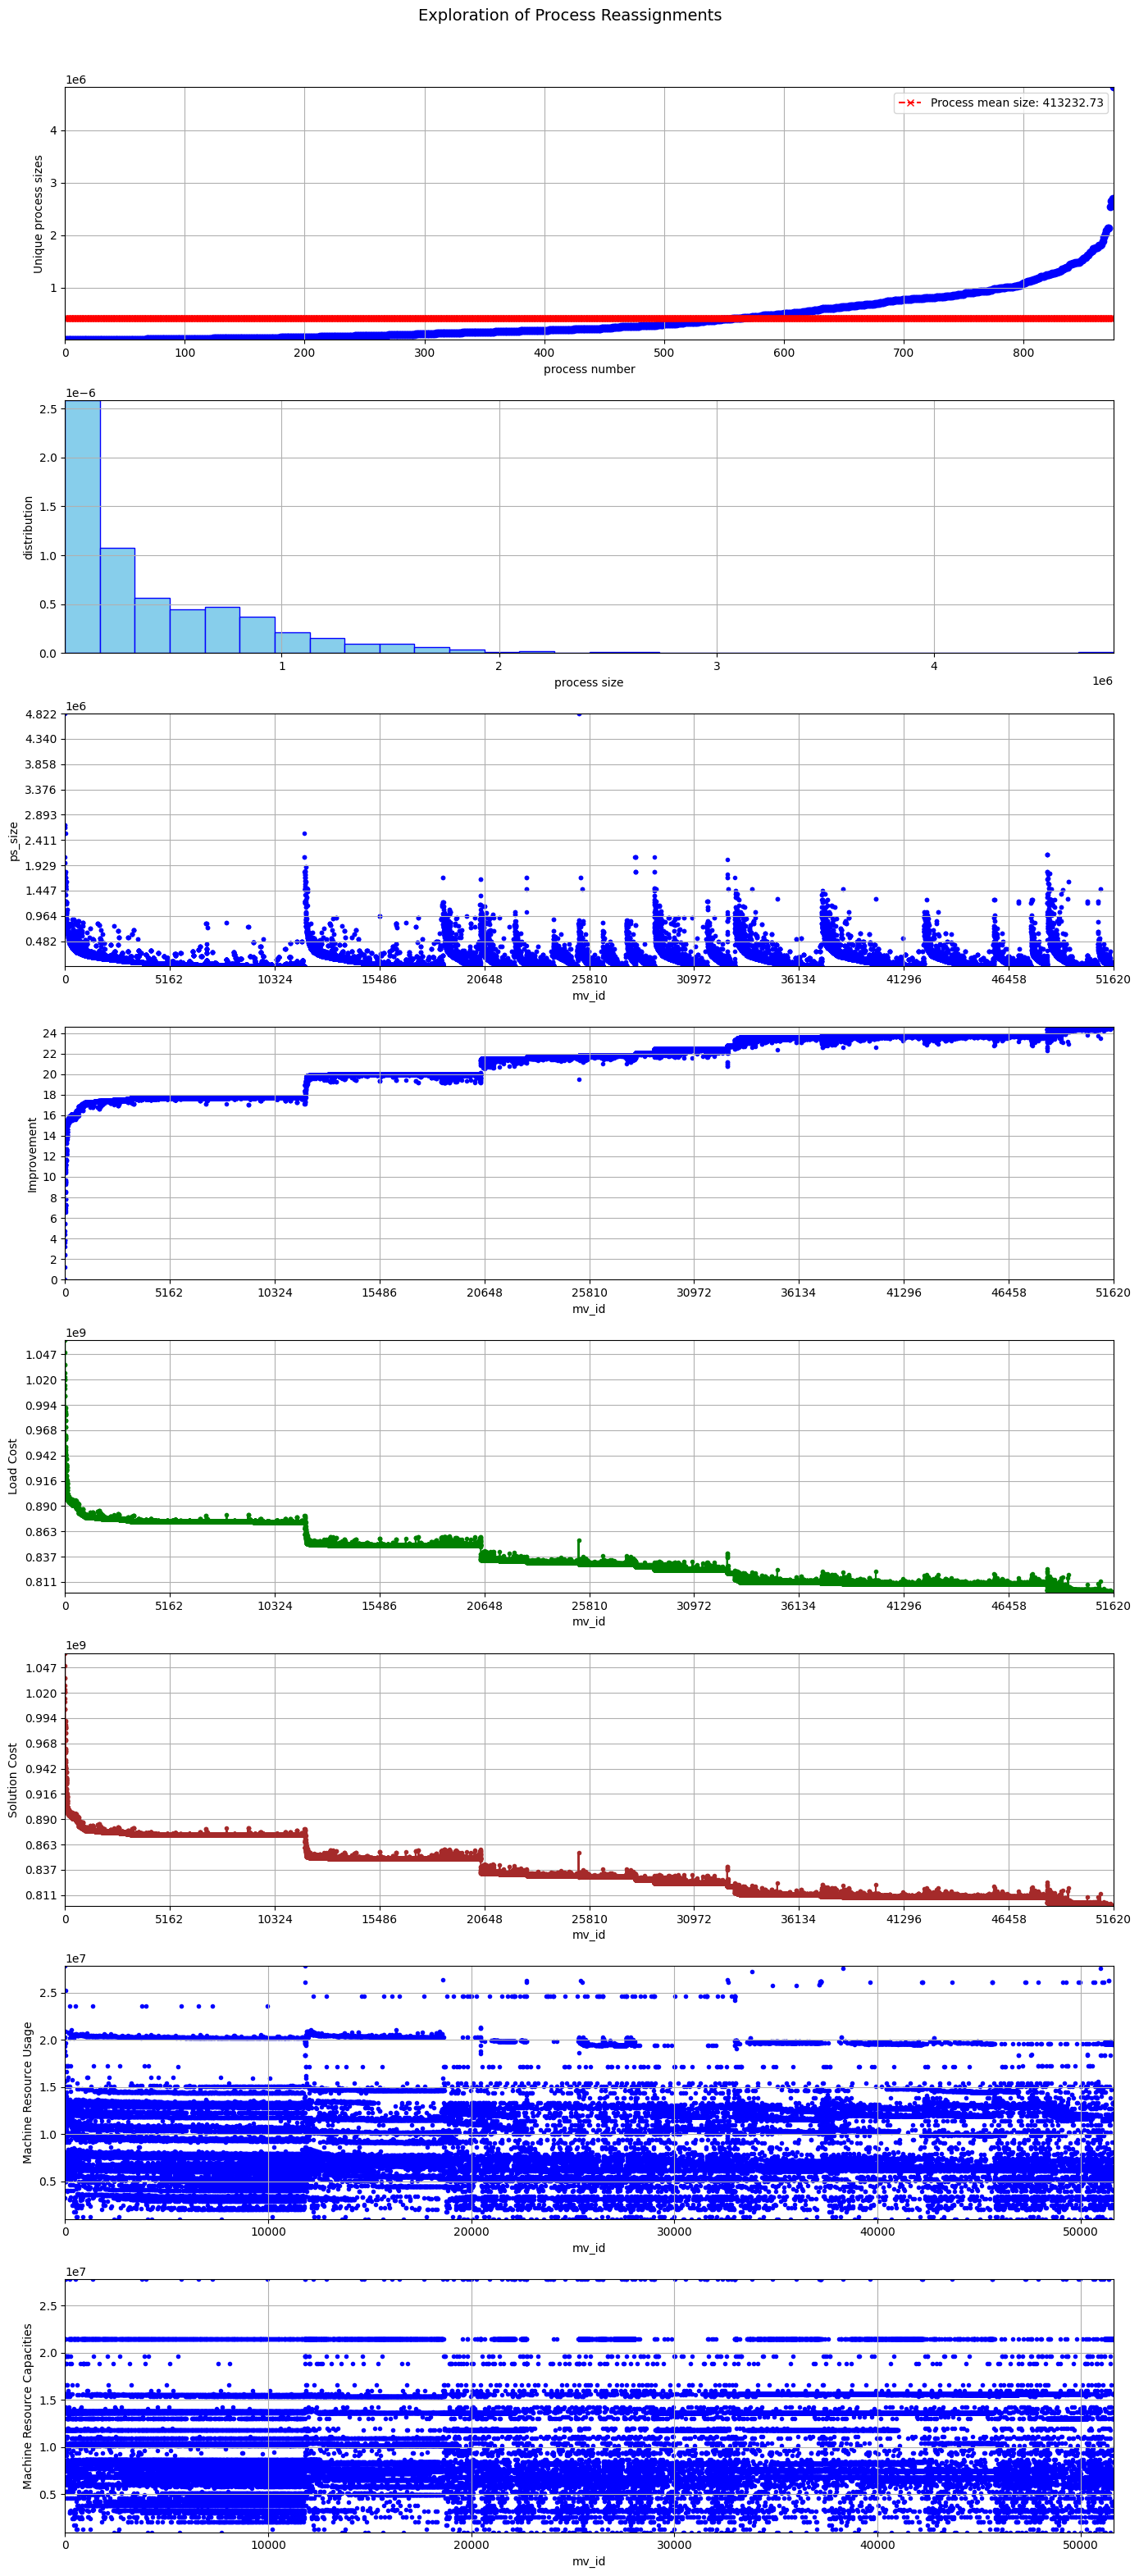

In [19]:
ps_sizes = np.unique(dataset.ps_size)
ps_sizes = np.sort(ps_sizes)

mean_ps_size = np.mean(ps_sizes)
mean_ps_size = np.full((len(ps_sizes),), mean_ps_size) # Broadcast mean to shape of ps_sizes

pltw.fig(
    ttl="Exploration of Process Reassignments",
    plots=[
        pltw.plot(ylbl="Unique process sizes", xlbl="process number",
                  y=[ps_sizes,
                     mean_ps_size],
                  kwargs=[{"marker": 'o', "color": 'b', "ptype": 'scatter'},
                          {"marker": 'x', "color": 'r', "label": f'Process mean size: {mean_ps_size[0]:.2f}', "linestyle": '--'}]),
        pltw.plot(ylbl="distribution", xlbl="process size",
                  y=ps_sizes, 
                  x=30,
                  kwargs={"color": 'skyblue', "edgecolor": 'blue', "ptype": 'hist'}),
        pltw.plot(xlbl="mv_id", ylbl="ps_size",
                  fticks=10,
                  y=dataset.ps_size, kwargs={"color": 'blue', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(xlbl="mv_id", ylbl="Improvement", 
                  y=dataset.solution_cost_improvement, 
                  fticks=10,
                  kwargs={"color": 'blue', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(xlbl="mv_id", ylbl="Load Cost",
                  y=dataset.load_cost, 
                  fticks=10,
                  kwargs={"color": 'green', "marker": '.'}),
        pltw.plot(xlbl="mv_id", ylbl="Solution Cost",
                  y=dataset.solution_cost, 
                  fticks=10,
                  kwargs={"color": 'brown', "marker": '.'}),
        pltw.plot(xlbl="mv_id", ylbl="Machine Resource Usage",
                  y=dataset.src_machine_usage,
                  kwargs={"color": 'blue', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(xlbl="mv_id", ylbl="Machine Resource Capacities",
                  y=dataset.src_machine_capacity,
                  kwargs={"color": 'blue', "marker": '.', "ptype": 'scatter'}),
    ],
)


## 2 / Investigation into improvement jumps

In [44]:
reload_modules()


In [ ]:
# - [ ] Basics, No. Moves/Processes/Solutions/Machines
# - [ ] Process Sizes/Mean/Distr, Distr of req, Freq of moves vs Size
# - [ ] Machine Capacities, Distr of capacities
# - [ ] Moves; Total, Per solution, Per process
# - [ ] Avg Target Machine capacity
# - [ ] Avg % of available/taken capacity


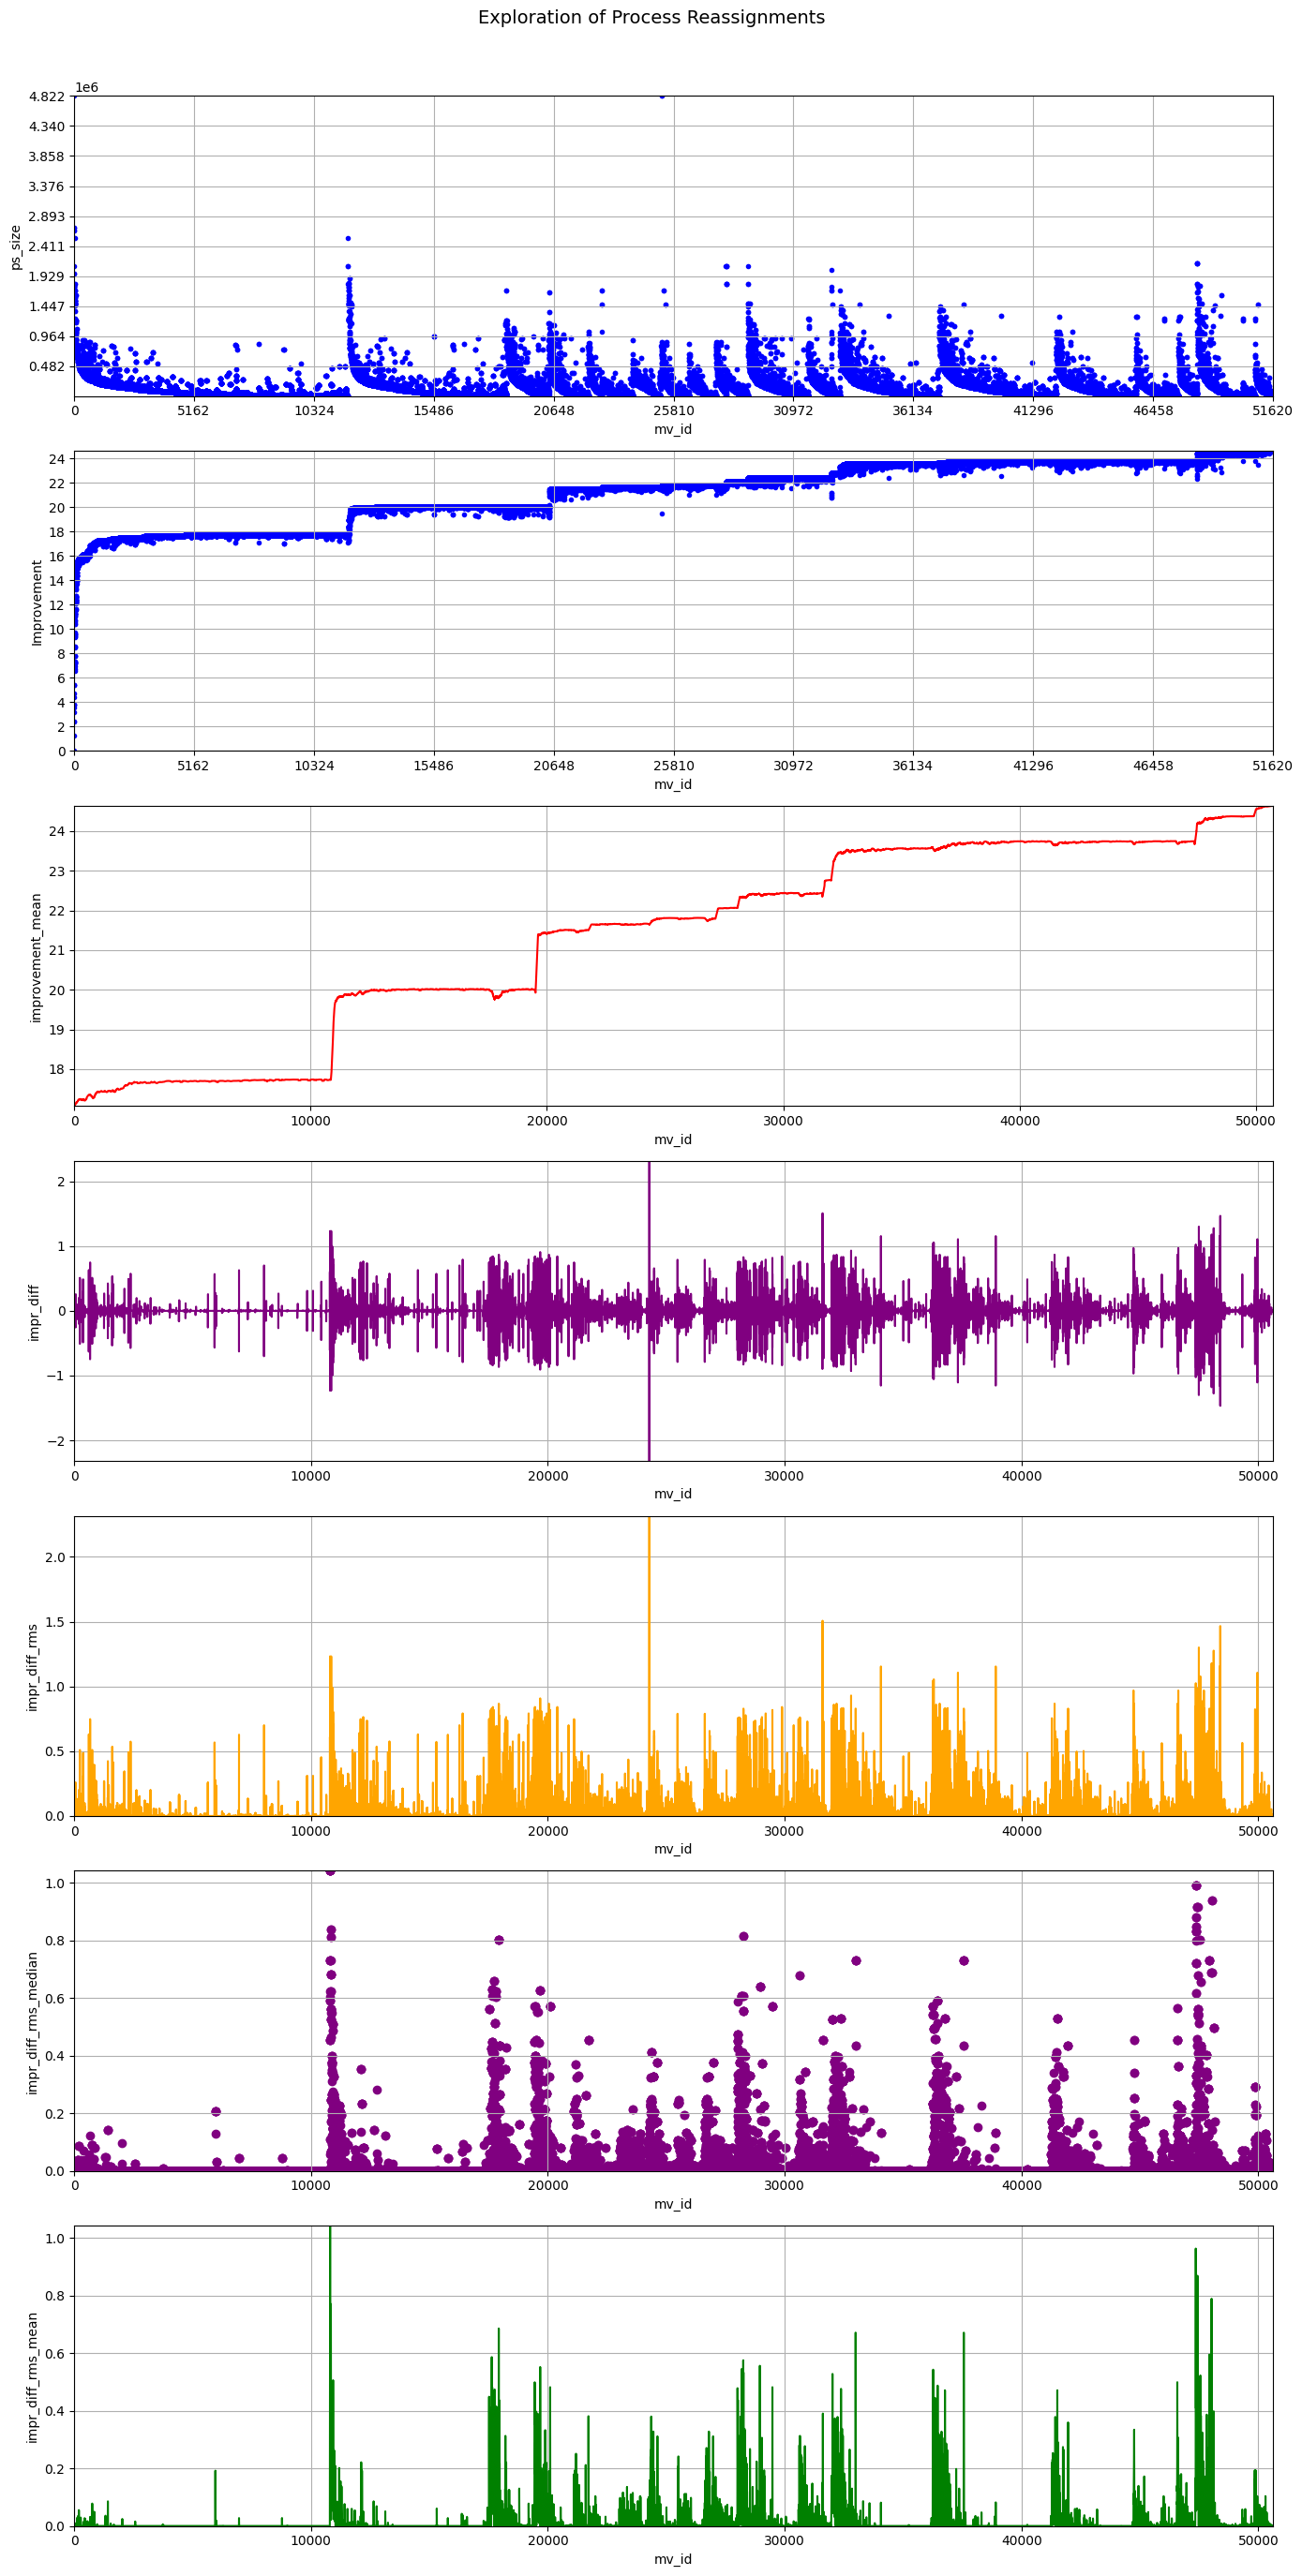

In [59]:
improvement_mean = time_domain_utils.moving_average(dataset.solution_cost_improvement[900:], window=100)
improvement_diff = feature_extraction_utils.diff(dataset.solution_cost_improvement[1000:])
impr_diff_rms = feature_extraction_utils.rms(improvement_diff)
impr_diff_rms_median = processing_utils.apply_median_filter(impr_diff_rms, window=5, mode='reflect')
impr_diff_rms_mean = time_domain_utils.moving_average(impr_diff_rms_median, window=5)

pltw.fig(
    ttl="Exploration of Process Reassignments",
    plots=[
        pltw.plot(xlbl="mv_id", ylbl="ps_size",
                  fticks=10,
                  y=dataset.ps_size, 
                  kwargs={"color": 'blue', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(xlbl="mv_id", ylbl="Improvement", 
                  y=dataset.solution_cost_improvement, 
                  fticks=10,
                  kwargs={"color": 'blue', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(xlbl="mv_id", ylbl="improvement_mean", 
                  y=improvement_mean, 
                  kwargs={"color": 'red'}),
        pltw.plot(xlbl="mv_id", ylbl="impr_diff",
                  y=improvement_diff,
                  kwargs={"color": 'purple'}),
        pltw.plot(xlbl="mv_id", ylbl="impr_diff_rms",
                  y=impr_diff_rms,
                  kwargs={"color": 'orange'}),
        pltw.plot(xlbl="mv_id", ylbl="impr_diff_rms_median",
                  y=impr_diff_rms_median,
                  kwargs={"color": 'purple', "ptype": 'scatter'}),
        pltw.plot(xlbl="mv_id", ylbl="impr_diff_rms_mean",
                  y=impr_diff_rms_mean,
                  kwargs={"color": 'green'}),
    ],
)


# Exploration: Processes
---

In [394]:
reload_modules()
dataset = dataset_manager.ReassignmentsDataset(dataset_fraction=0.25)


Loading 206485 entries frm dataset: /home/pbiel/repos/jask/analytics/a12_new/process_reassignments.csv.
Sampled dataset to 51621 entries.
Completed loading dataset.


[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[transitions_reassignments_count] - shape: (192,)
[1 3 9 2 1] ... [ 5 15  7  4 26]
[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[solution_cost_improvement_deltas] - shape: (192,)
samples: [0.     2.4285 1.4025 1.6112 1.514 ] ... [0.003  0.0008 0.0019 0.0006 0.0003]
[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[transitions_reassignments_count] - shape: (192,)
[1 3 9 2 1] ... [ 5 15  7  4 26]
[transition_statistics] - transition 0: moves: 1, total_size=4825692, mean=4825692.0, min=4825692, max=4825692, diff=0.0
[transition_statistics] - transition 1: moves: 3, total_size=7408812, mean=

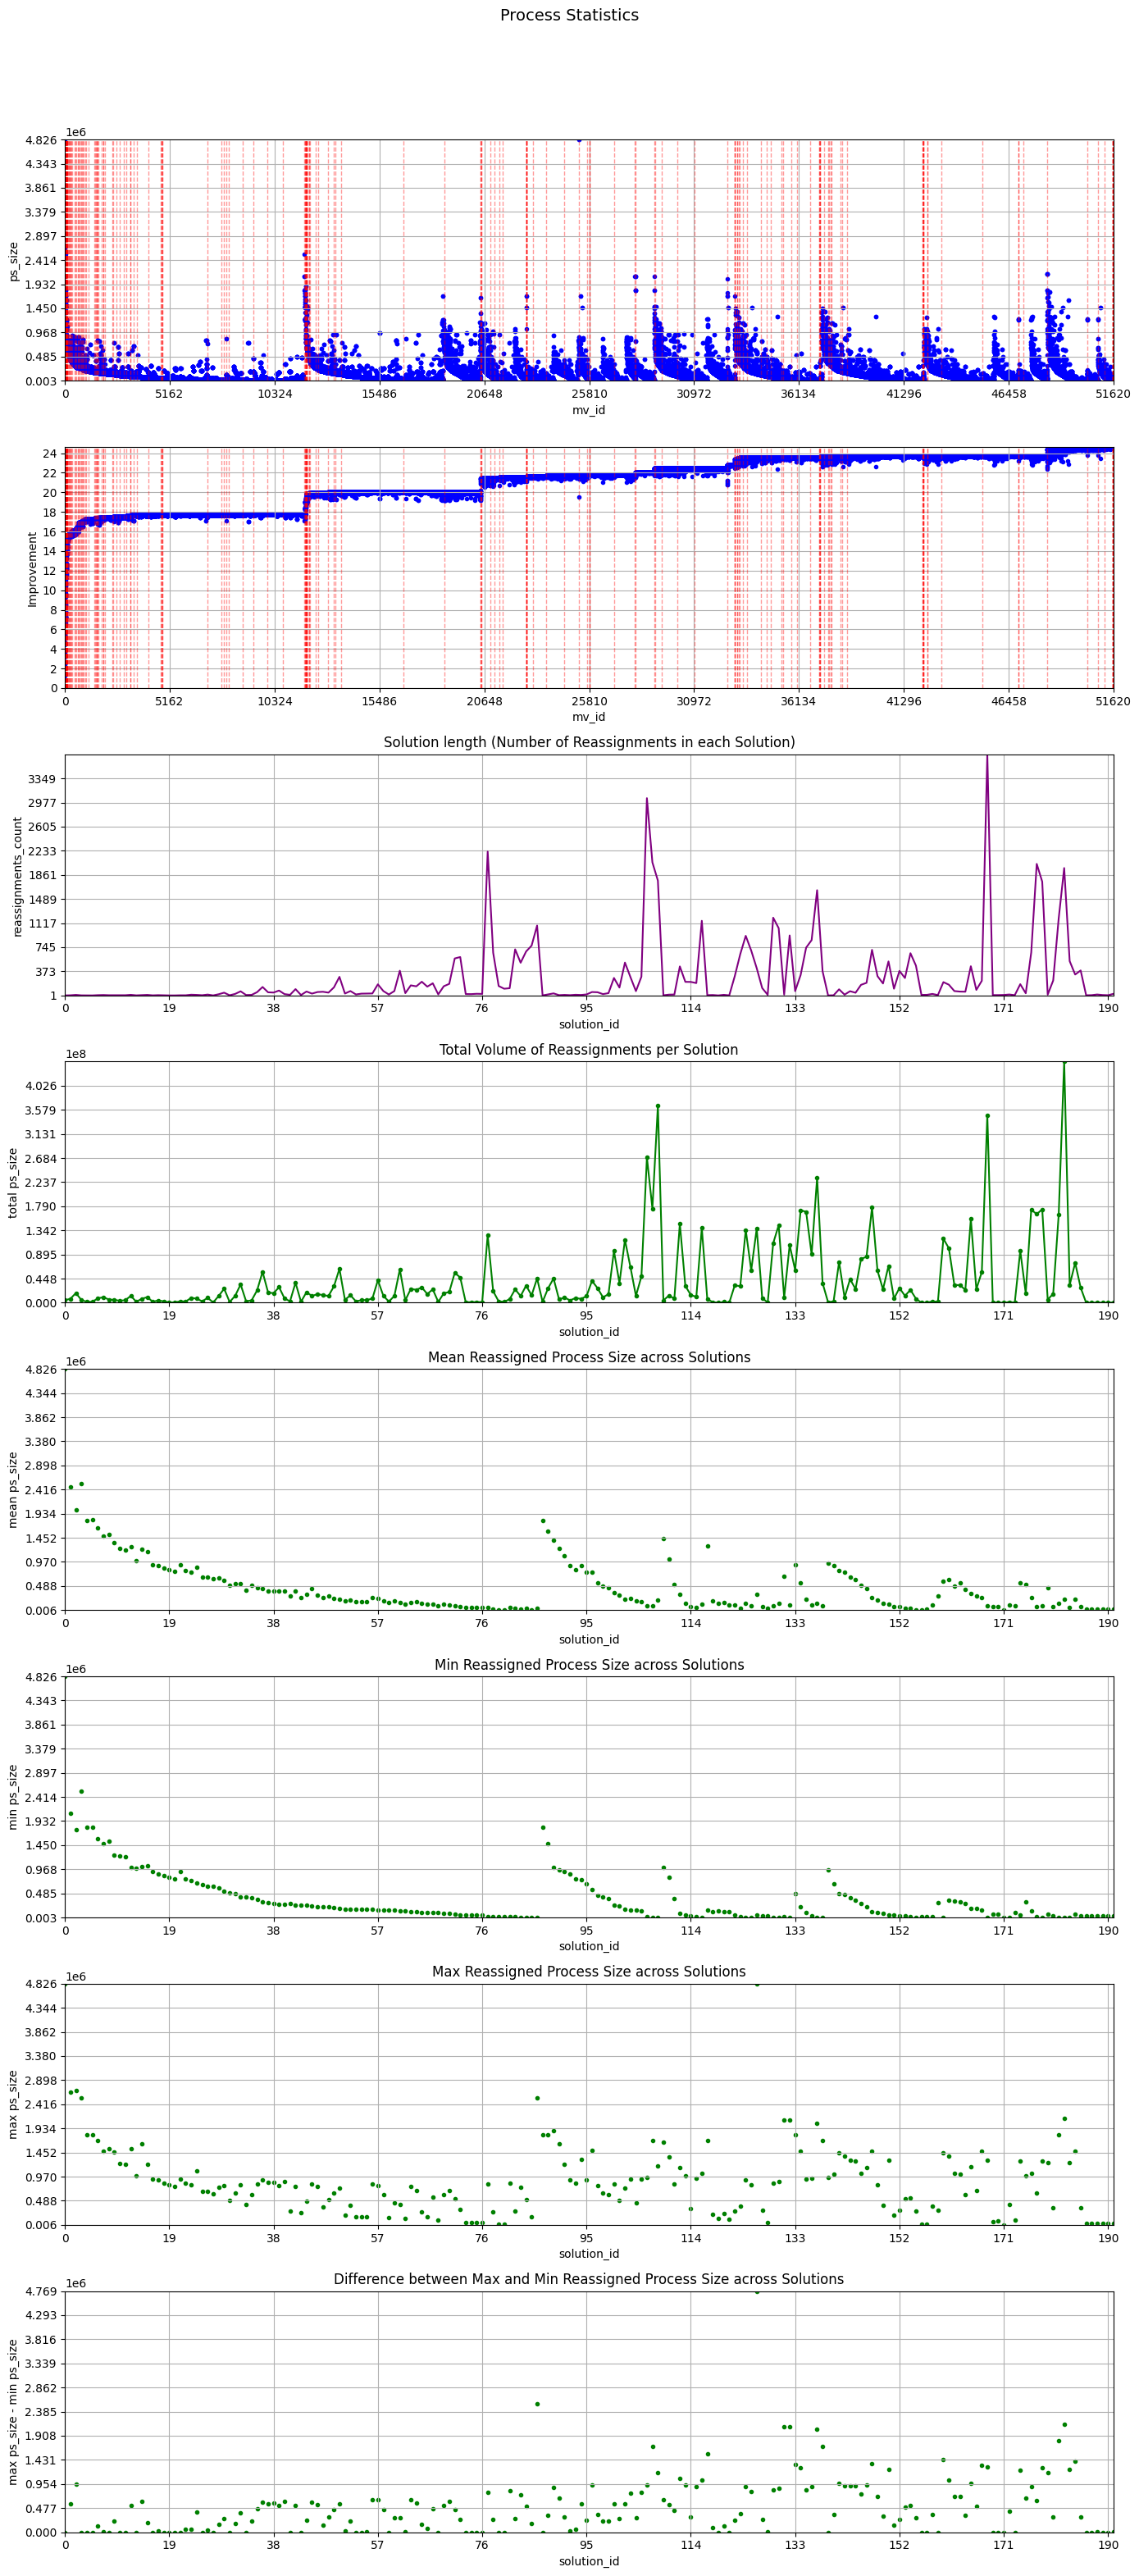

In [400]:
solution_state_change_idx = dataset.solution_state_change_points()
solution_moves_count = dataset.transitions_reassignments_count()
cost_impr_deltas = dataset.solution_cost_improvement_deltas()
trans_size, trans_mean, trans_min, trans_max, trans_diff = dataset.transition_statistics()

# Create a mapping of solution state change indices to the corresponding move IDs
transitions_to_moves = np.full(len(dataset.move_id), np.nan, dtype=float)
for idx, move_id in enumerate(solution_state_change_idx[:-1]):
    transitions_to_moves[move_id] = cost_impr_deltas[idx]

pltw.fig(
    ttl="Process Statistics",
    plots=[
        pltw.plot(ylbl="ps_size",
                  xlbl="mv_id",
                  y=dataset.ps_size, 
                  fticks=10,
                  vlines=solution_state_change_idx.tolist(),
                  kwargs={
                      "color": 'blue', 
                      "marker": '.', 
                      "vlines": {"color": 'red', "alpha": 0.4, "linestyle": '--'},
                      "ptype": 'scatter'}),
        pltw.plot(ylbl="Improvement", 
                  xlbl="mv_id", 
                  y=dataset.solution_cost_improvement, 
                  fticks=10,
                  vlines=solution_state_change_idx.tolist(),
                  kwargs={"color": 'blue', 
                          "marker": '.',
                          "vlines": {"color": 'red', "alpha": 0.4, "linestyle": '--'},
                          "ptype": 'scatter'}),
        pltw.plot(ttl="Solution length (Number of Reassignments in each Solution)", 
                  xlbl="solution_id", 
                  ylbl="reassignments_count",
                  fticks=10,
                  y=solution_moves_count, 
                  kwargs={"color": 'purple'}),
        pltw.plot(ttl="Total Volume of Reassignments per Solution", 
                  xlbl="solution_id", 
                  ylbl="total ps_size", 
                  y=trans_size,
                  fticks=10,
                  kwargs={"color": 'green', "marker": '.'}),
        pltw.plot(ttl="Mean Reassigned Process Size across Solutions", 
                  xlbl="solution_id", 
                  ylbl="mean ps_size", 
                  y=trans_mean,
                  fticks=10,
                  kwargs={"color": 'green', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(ttl="Min Reassigned Process Size across Solutions", 
                  xlbl="solution_id", 
                  ylbl="min ps_size", 
                  y=trans_min,
                  fticks=10,
                  kwargs={"color": 'green', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(ttl="Max Reassigned Process Size across Solutions", 
                  xlbl="solution_id", 
                  ylbl="max ps_size", 
                  y=trans_max,
                  fticks=10,
                  kwargs={"color": 'green', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(ttl="Difference between Max and Min Reassigned Process Size across Solutions",
                  xlbl="solution_id",
                  ylbl="max ps_size - min ps_size",
                  y=trans_diff,
                  fticks=10,
                  kwargs={"color": 'green', "marker": '.', "ptype": 'scatter'}),
    ],
)


- Mean process size steadily decreases over time, until reaching critical point of improvement_delta, which triggers large process reassignment, and cycle restarts, but each time to a lower maximum.
- Even with highest mean_size reassignments early in the iteration cycle, the total reassignment volume size is inversed - lowest early and exponentially growing - i.e. smaller reassignments at significantly higher rates.

# Exploration: Solution Improvement Cost
---

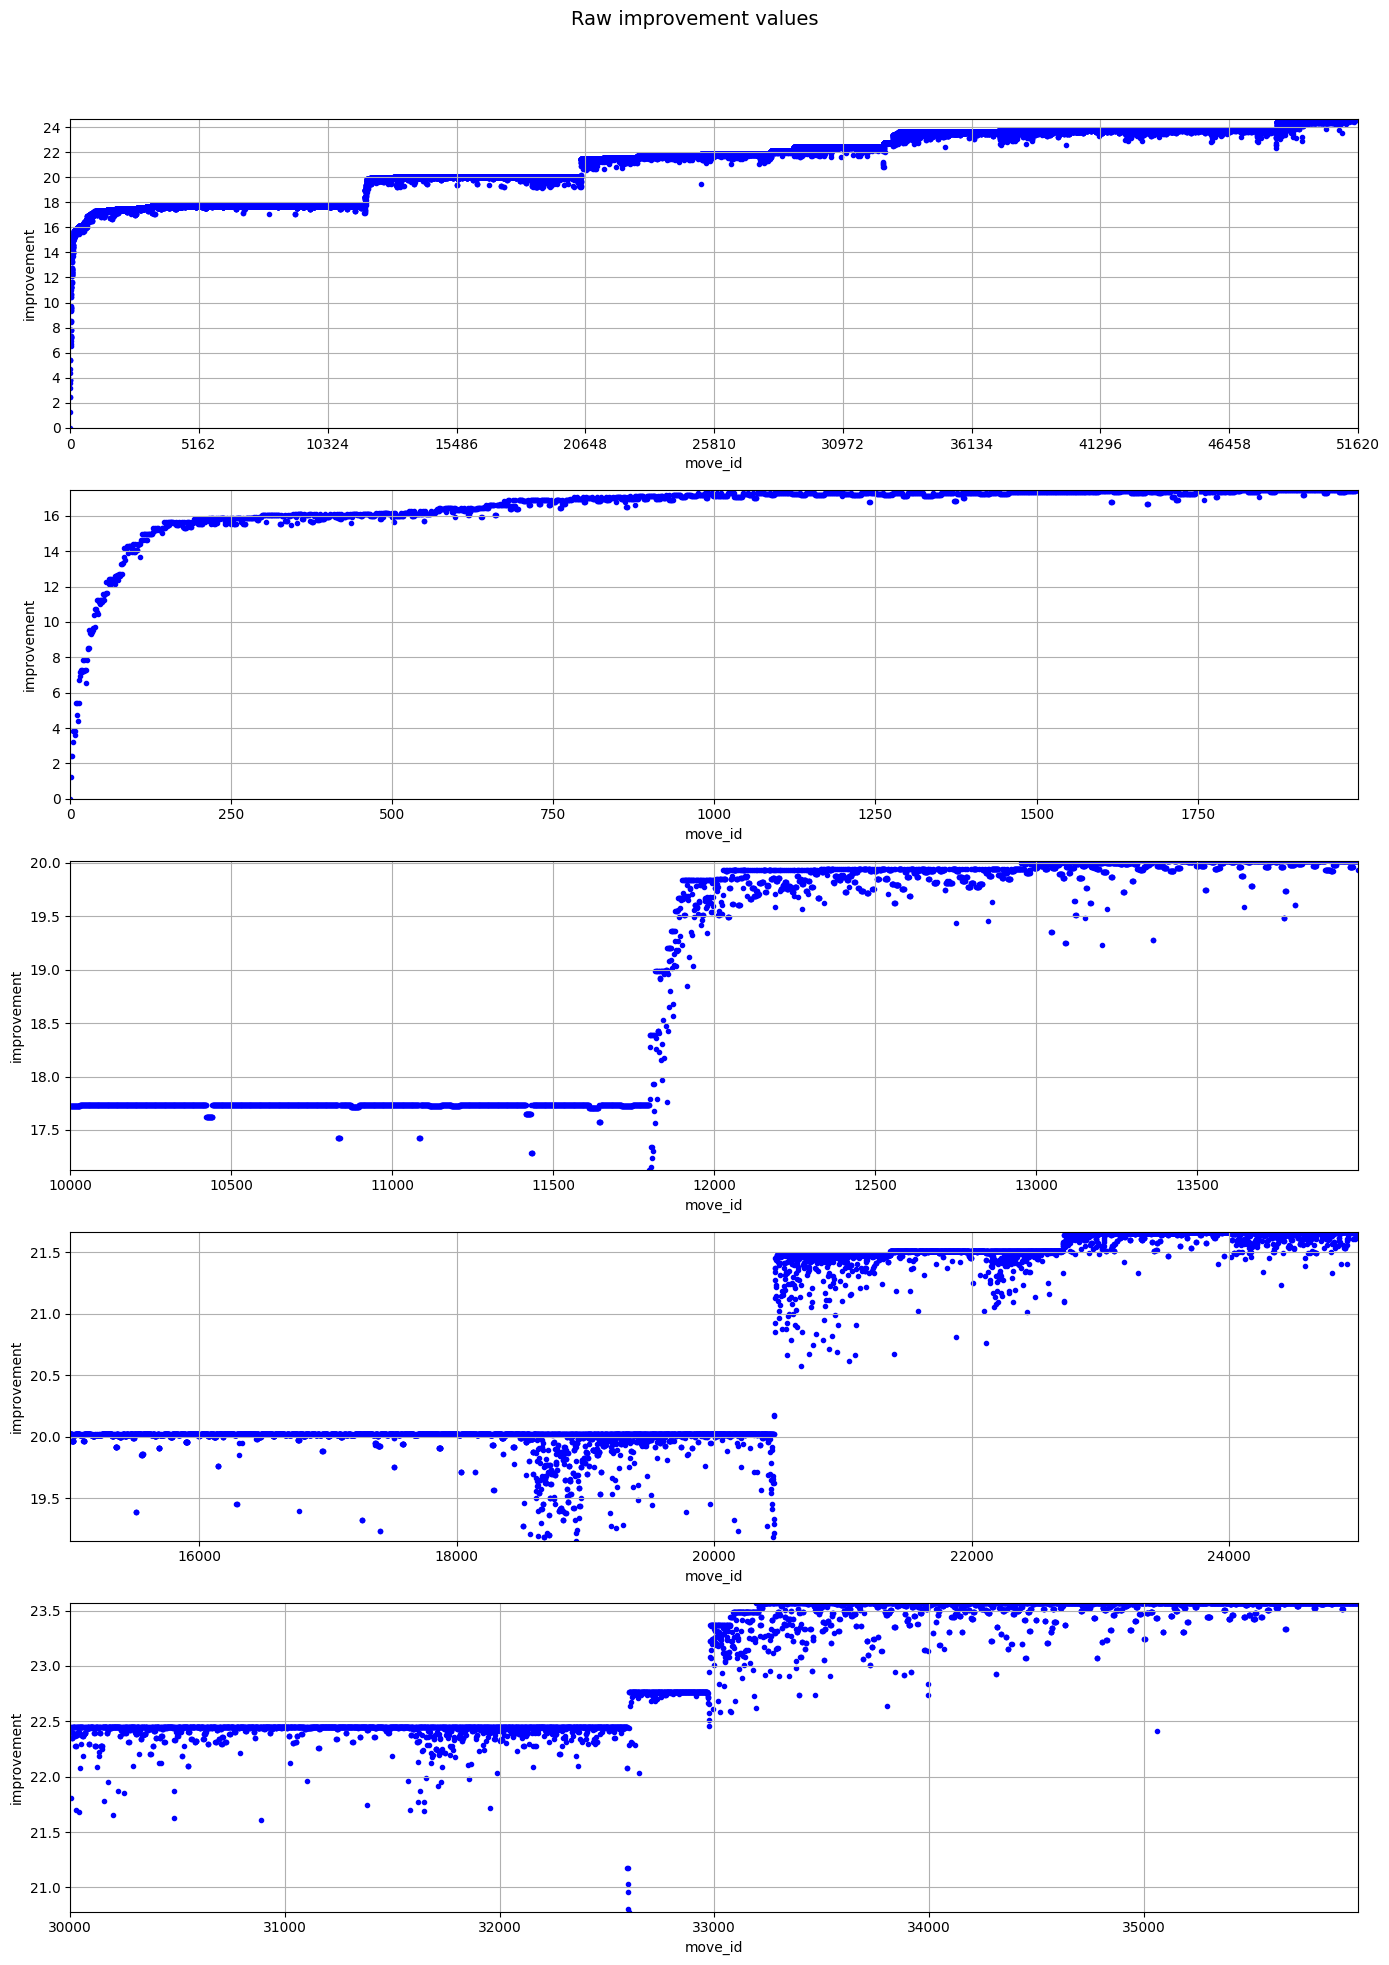

In [320]:
pltw.fig(
    ttl="Raw improvement values",
    plots=[
        pltw.plot(xlbl="move_id", ylbl="improvement", 
                  y=dataset.solution_cost_improvement, 
                  fticks=10,
                  kwargs={"color": 'blue', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(xlbl="move_id", ylbl="improvement", 
                  y=dataset.solution_cost_improvement[0:2000],
                  x=np.arange(0, 2000),
                  kwargs={"color": 'blue', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(xlbl="move_id", ylbl="improvement", 
                  y=dataset.solution_cost_improvement[10000:14000], 
                  x=np.arange(10000, 14000),
                  kwargs={"color": 'blue', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(xlbl="move_id", ylbl="improvement", 
                  y=dataset.solution_cost_improvement[15000:25000], 
                  x=np.arange(15000, 25000),
                  kwargs={"color": 'blue', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(xlbl="move_id", ylbl="improvement", 
                  y=dataset.solution_cost_improvement[30000:36000], 
                  x=np.arange(30000, 36000),
                  kwargs={"color": 'blue', "marker": '.', "ptype": 'scatter'}),
        ]
)


[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]


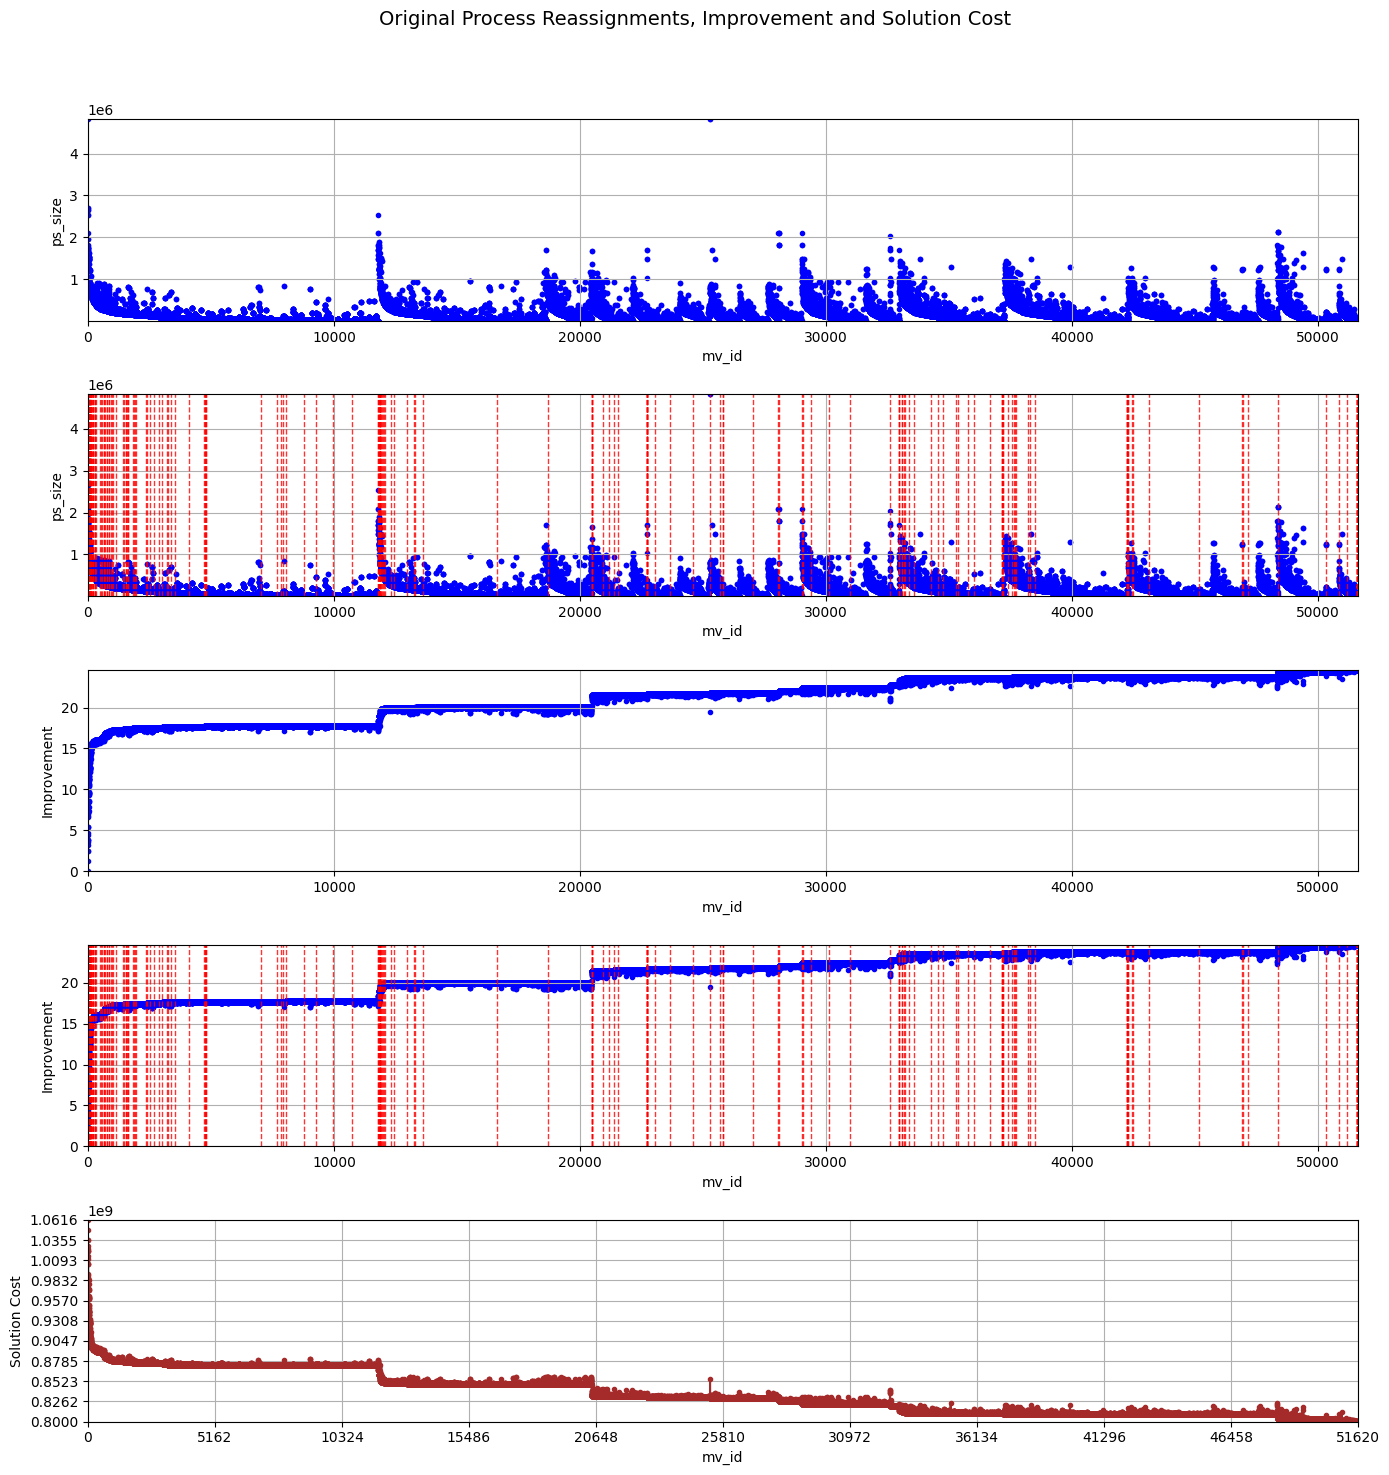

In [396]:
solution_state_change_idx = dataset.solution_state_change_points()

pltw.fig(    
    ttl="Original Process Reassignments, Improvement and Solution Cost",
    plt_height=3,
    plots=[
        pltw.plot(xlbl="mv_id", ylbl="ps_size",
                  y=dataset.ps_size, kwargs={"color": 'blue', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(xlbl="mv_id", ylbl="ps_size",
                  vlines=solution_state_change_idx.tolist() ,
                  y=dataset.ps_size, kwargs={"color": 'blue', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(xlbl="mv_id", ylbl="Improvement", 
                  y=dataset.solution_cost_improvement, 
                  kwargs={"color": 'blue', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(xlbl="mv_id", ylbl="Improvement", 
                  y=dataset.solution_cost_improvement, 
                  vlines=solution_state_change_idx.tolist(),
                  kwargs={"color": 'blue', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(xlbl="mv_id", ylbl="Solution Cost",
                  y=dataset.solution_cost, 
                  fticks=10,
                  kwargs={"color": 'brown', "marker": '.'}),
    ],
)


Closer looks at the spiked regions at around `mv_id=11_000`

Linear regression on the diff to figure out the overall improvement direction

impr_seg_lr len=7, shape=(7, 500)
impr_segments len=7
multiplot - Using 2 ydata series with plot_kwargs_list: [{'color': 'green'}, {'color': 'green', 'linestyle': '--', 'label': 'slope: 0.00001460'}]
multiplot - Using 2 ydata series with plot_kwargs_list: [{'color': 'green'}, {'color': 'green', 'linestyle': '--', 'label': 'slope: 0.00002027'}]
multiplot - Using 2 ydata series with plot_kwargs_list: [{'color': 'green'}, {'color': 'green', 'linestyle': '--', 'label': 'slope: -0.00000623'}]
multiplot - Using 2 ydata series with plot_kwargs_list: [{'color': 'red'}, {'color': 'red', 'linestyle': '--', 'label': 'slope: 0.00390516'}]
multiplot - Using 2 ydata series with plot_kwargs_list: [{'color': 'orange'}, {'color': 'orange', 'linestyle': '--', 'label': 'slope: 0.00008095'}]
multiplot - Using 2 ydata series with plot_kwargs_list: [{'color': 'orange'}, {'color': 'orange', 'linestyle': '--', 'label': 'slope: 0.00014661'}]
multiplot - Using 2 ydata series with plot_kwargs_list: [{'color': 'g

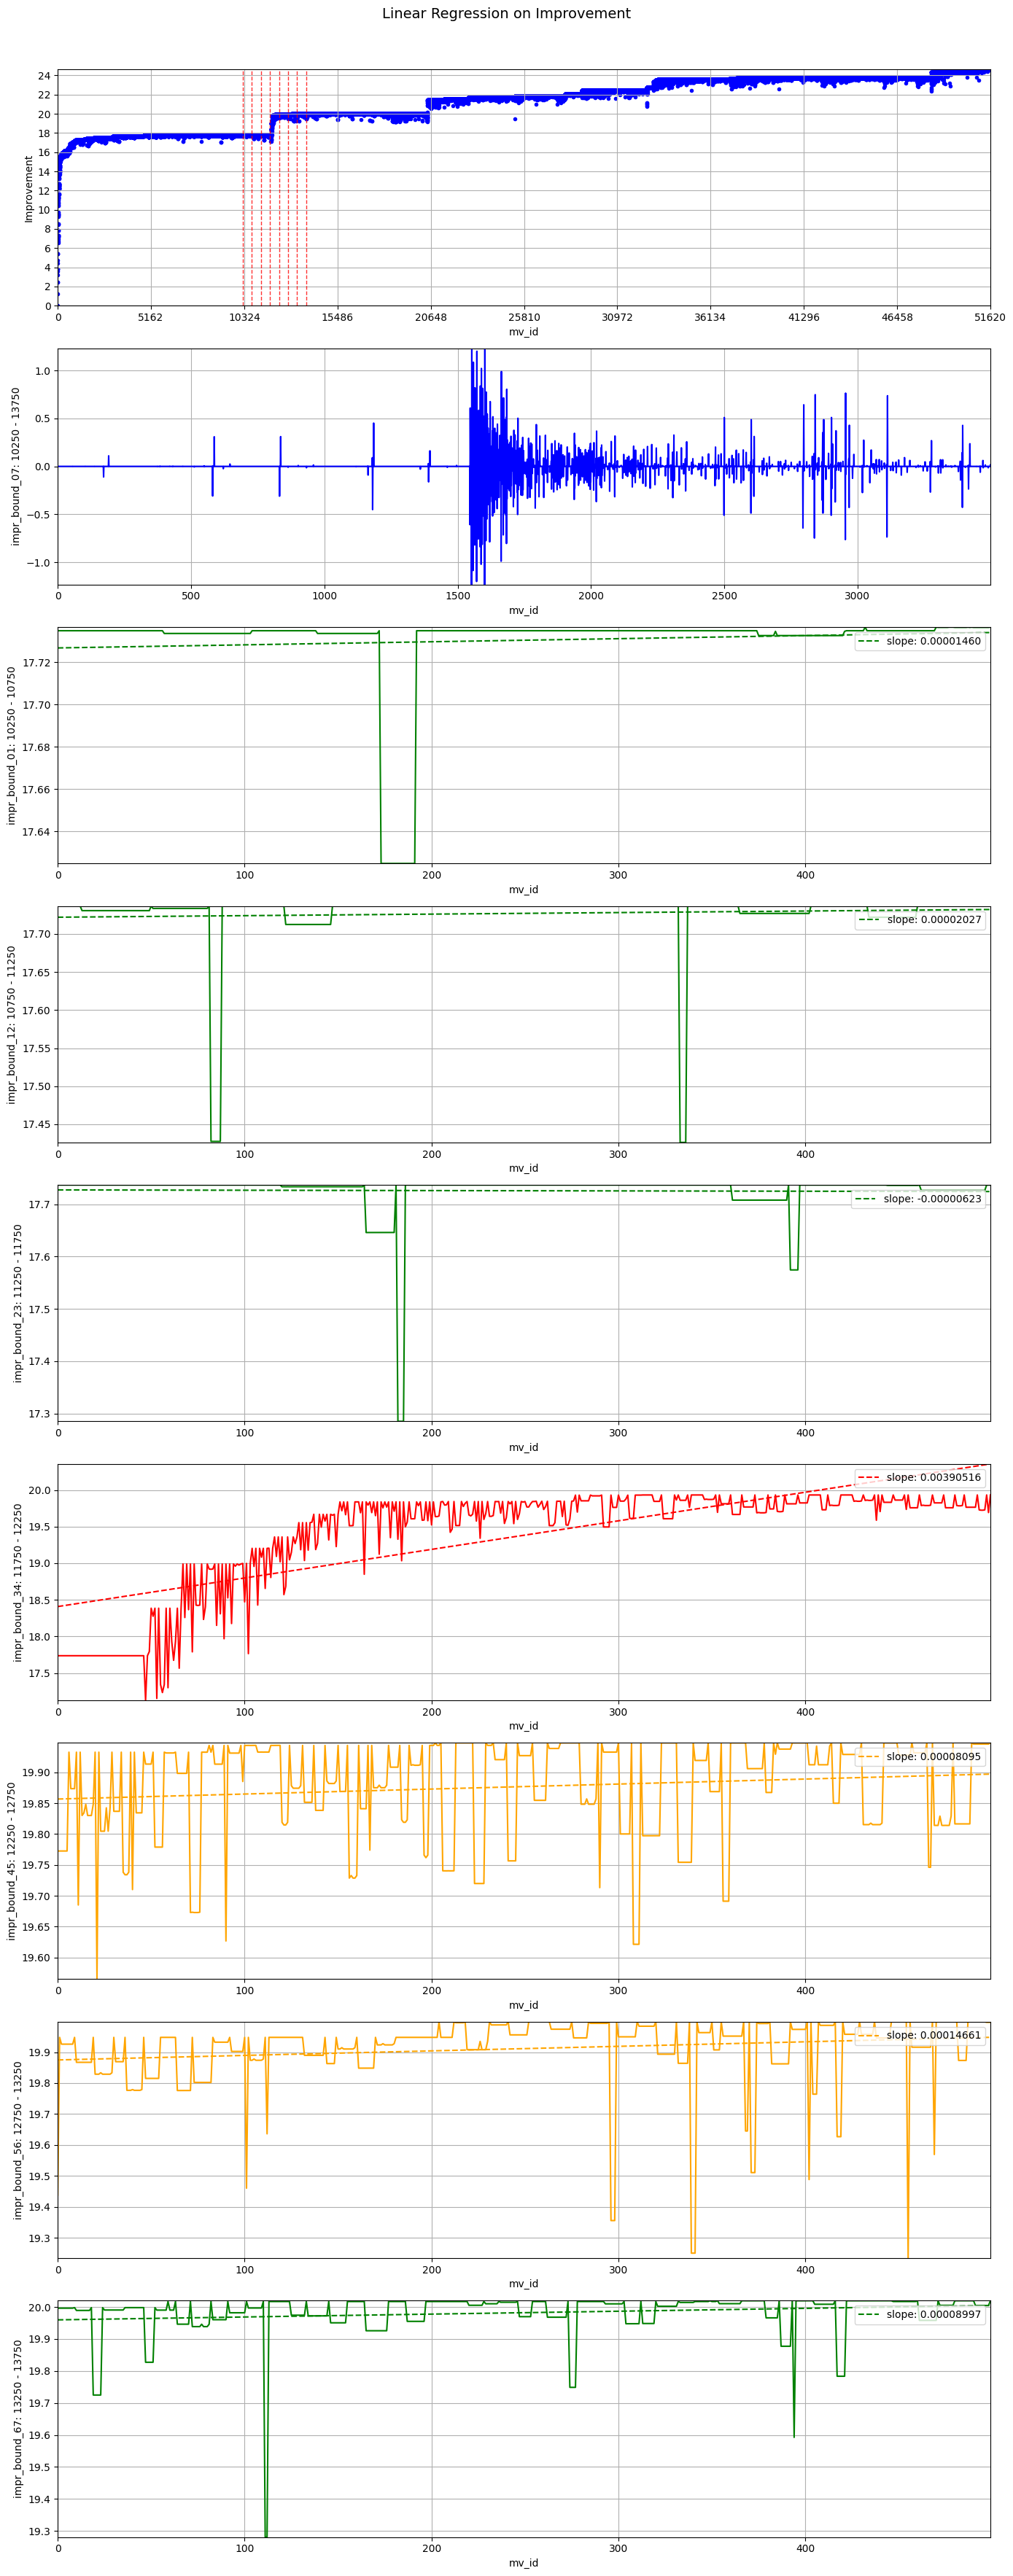

In [103]:
impr = dataset.solution_cost_improvement

def create_bounds(start, steps, step_size=500):
    """Create bounds for segments based on start, steps and step_size."""
    return [start + i * step_size for i in range(steps + 1)]

bounds = create_bounds(10250, 7, 500)

# bounds between [3] and [4] = [11750, 12250]

# iterate over bounds to create segments
impr_segments = []
impr_segment_regression = []
impr_segment_slopes = []

for i in range(len(bounds) - 1):
    impr_segment = impr[bounds[i]:bounds[i + 1]]
    # impr_segment = feature_extraction_utils.diff(impr_segment)
    impr_segments.append(impr_segment)

    impr_segment_lr, m, _ = statistical_utils.linear_regression(impr_segment)
    impr_segment_regression.append(impr_segment_lr)
    impr_segment_slopes.append(m)

impr_extreme_segments = impr[bounds[0]:bounds[7]]
impr_extreme_segments = feature_extraction_utils.diff(impr_extreme_segments)

print(f"impr_seg_lr len={len(impr_segment_regression)}, shape={np.shape(impr_segment_regression)}")
print(f"impr_segments len={len(impr_segments)}")

pltw.fig(
    ttl="Linear Regression on Improvement",
    plots=[
        pltw.plot(xlbl="mv_id", ylbl="Improvement", 
                  y=dataset.solution_cost_improvement, 
                  fticks=10,
                  vlines=bounds,
                  kwargs={"color": 'blue', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(ylbl=f"impr_bound_07: {bounds[0]} - {bounds[7]}",
                  xlbl="mv_id",
                  y=impr_extreme_segments,
                  kwargs={"color": 'blue'}),
        pltw.plot(ylbl=f"impr_bound_01: {bounds[0]} - {bounds[1]}",
                  xlbl="mv_id",
                  y=[impr_segments[0], 
                     impr_segment_regression[0]],
                  kwargs=[{"color": 'green'},
                          {"color": 'green', "linestyle": '--', "label": f"slope: {impr_segment_slopes[0]:.8f}"}]),
        pltw.plot(ylbl=f"impr_bound_12: {bounds[1]} - {bounds[2]}",
                  xlbl="mv_id",
                  y=[impr_segments[1], 
                     impr_segment_regression[1]],
                  kwargs=[{"color": 'green'},
                          {"color": 'green', "linestyle": '--', "label": f"slope: {impr_segment_slopes[1]:.8f}"}]),
        pltw.plot(ylbl=f"impr_bound_23: {bounds[2]} - {bounds[3]}",
                  xlbl="mv_id",
                  y=[impr_segments[2], 
                     impr_segment_regression[2]],
                  kwargs=[{"color": 'green'},
                          {"color": 'green', "linestyle": '--', "label": f"slope: {impr_segment_slopes[2]:.8f}"}]),
        pltw.plot(ylbl=f"impr_bound_34: {bounds[3]} - {bounds[4]}",
                  xlbl="mv_id",
                  y=[impr_segments[3], 
                     impr_segment_regression[3]],
                  kwargs=[{"color": 'red'}, 
                          {"color": 'red', "linestyle": '--', "label": f"slope: {impr_segment_slopes[3]:.8f}"}]),
        pltw.plot(ylbl=f"impr_bound_45: {bounds[4]} - {bounds[5]}",
                  xlbl="mv_id",
                  y=[impr_segments[4], 
                     impr_segment_regression[4]],
                  kwargs=[{"color": 'orange'},
                          {"color": 'orange', "linestyle": '--', "label": f"slope: {impr_segment_slopes[4]:.8f}"}]),
        pltw.plot(ylbl=f"impr_bound_56: {bounds[5]} - {bounds[6]}",
                  xlbl="mv_id",
                  y=[impr_segments[5], 
                     impr_segment_regression[5]],
                  kwargs=[{"color": 'orange'},
                          {"color": 'orange', "linestyle": '--', "label": f"slope: {impr_segment_slopes[5]:.8f}"}]),
        pltw.plot(ylbl=f"impr_bound_67: {bounds[6]} - {bounds[7]}",
                  xlbl="mv_id",
                  y=[impr_segments[6], 
                     impr_segment_regression[6]],
                  kwargs=[{"color": 'green'},
                          {"color": 'green', "linestyle": '--', "label": f"slope: {impr_segment_slopes[6]:.8f}"}]),
    ],
)


- Creating many small segments based on reassignments and computing linear regression to plot slopes

impr_segment_slopes len=50, shape=(50,)


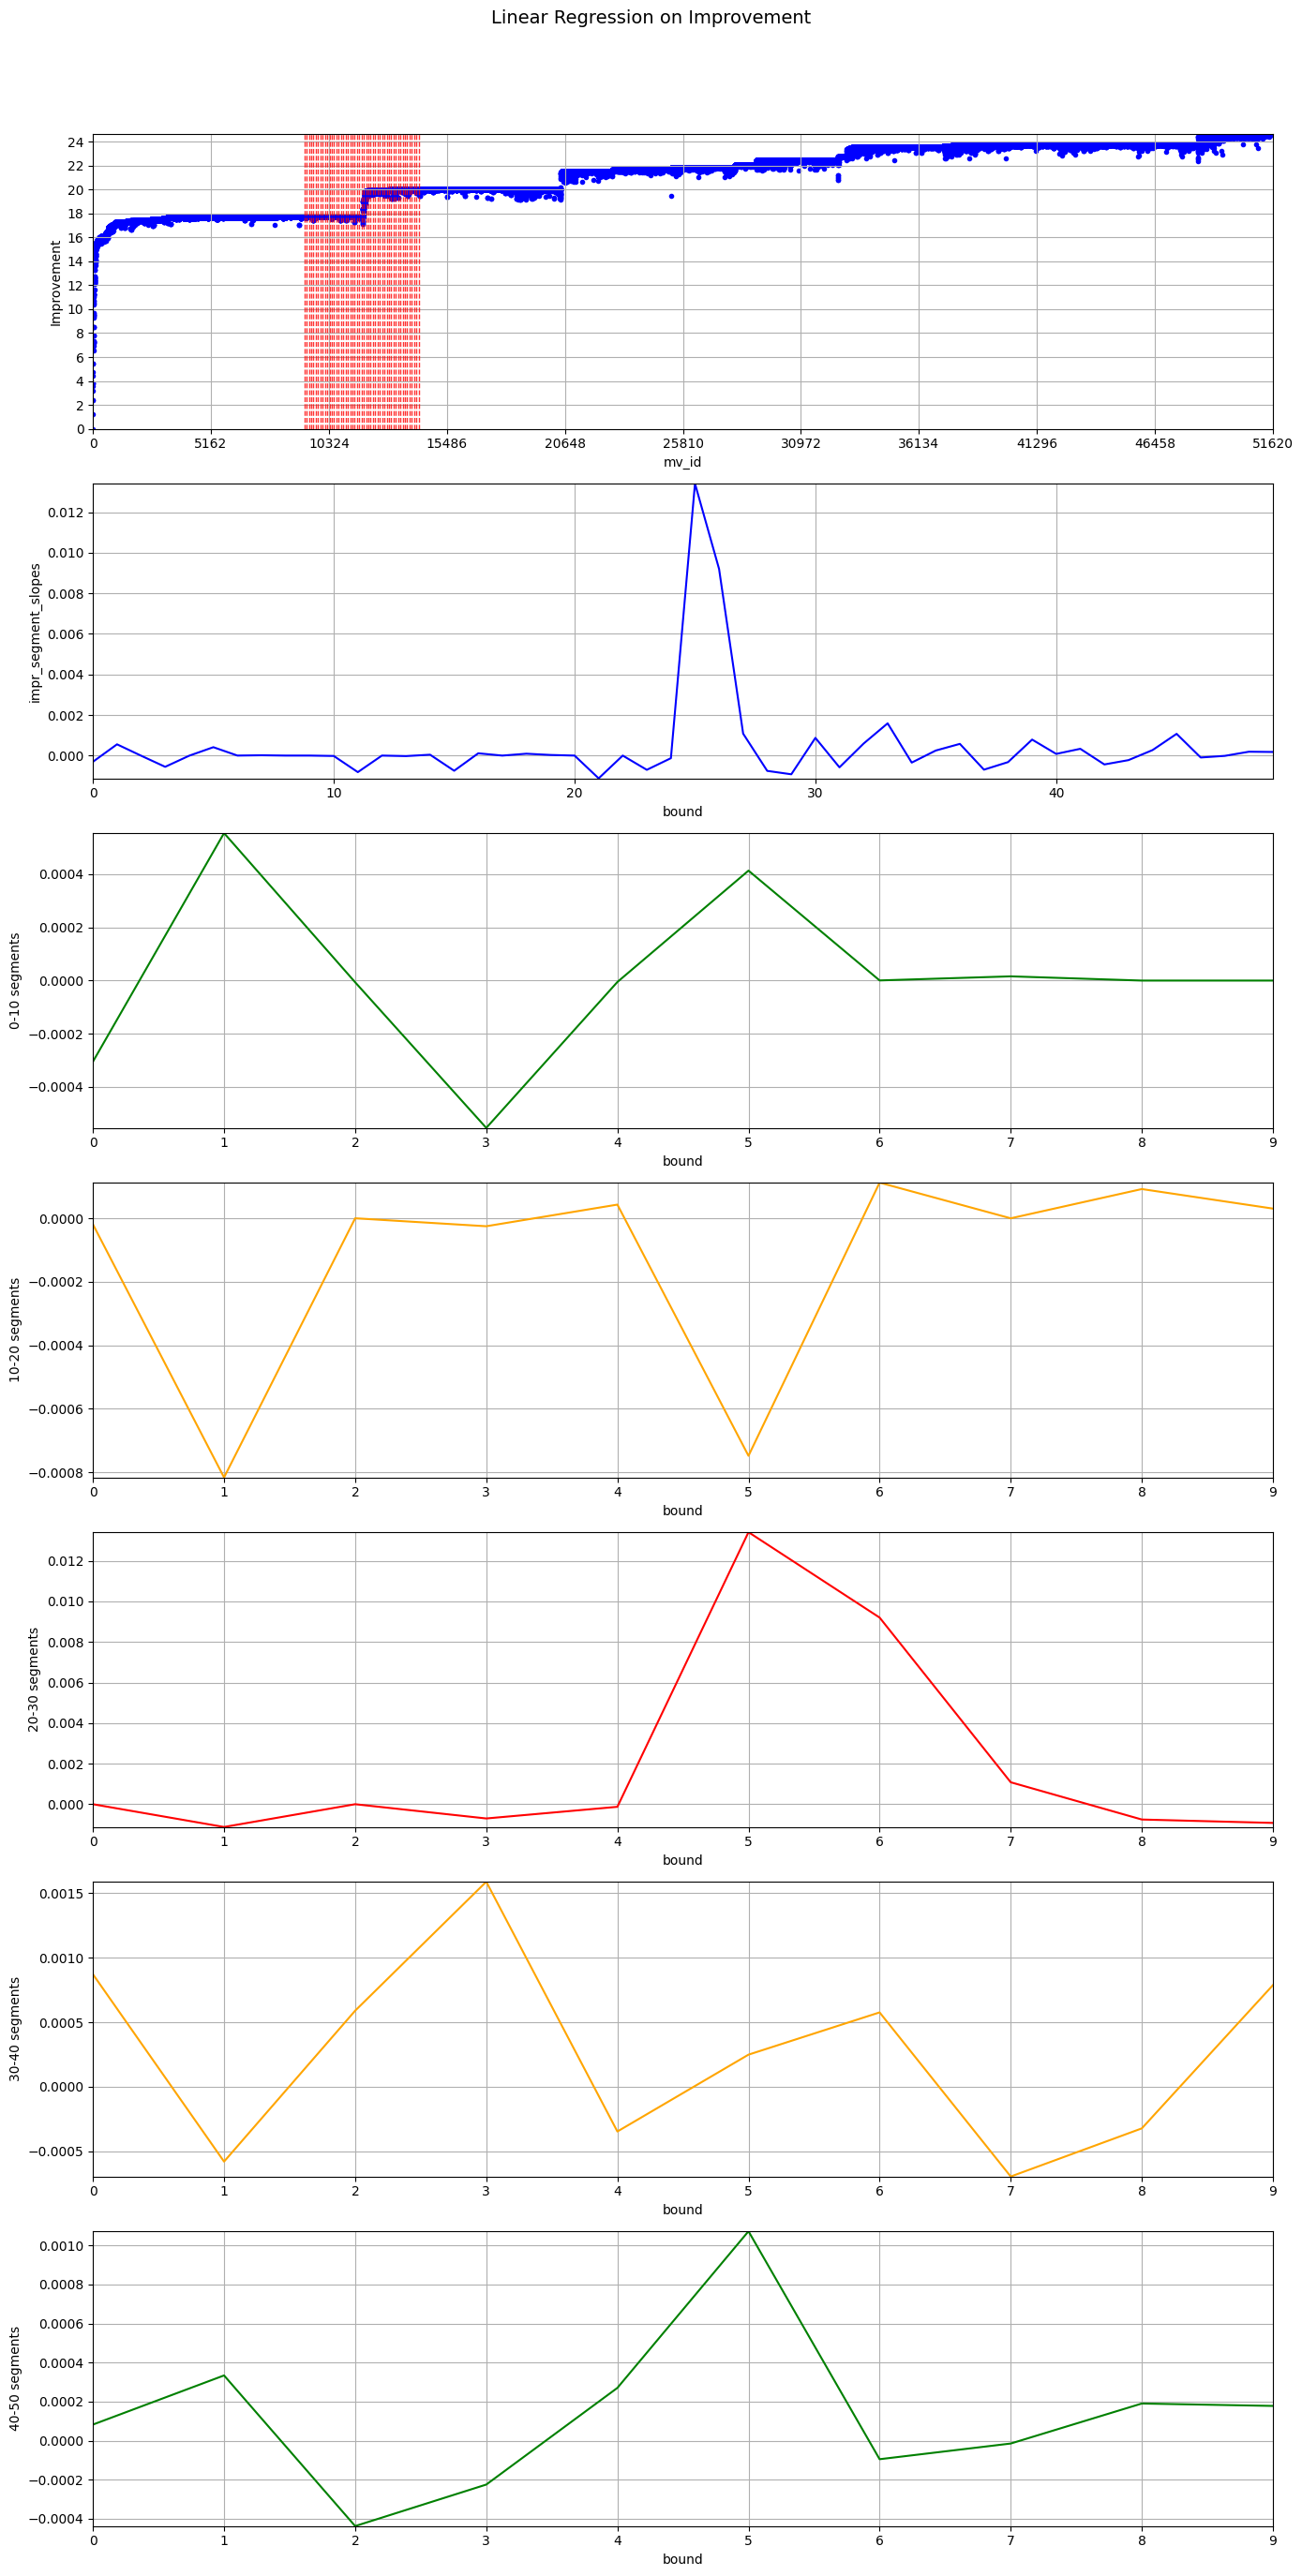

In [296]:
impr = dataset.solution_cost_improvement

def create_bounds(start, steps, step_size=500):
    """Create bounds for segments based on start, steps and step_size."""
    return [start + i * step_size for i in range(steps + 1)]

# improvement jump between = [11750, 12250]
bounds = create_bounds(9250, 50, 100)

impr_segment_slopes = []
for i in range(len(bounds) - 1):
    impr_segment = impr[bounds[i]:bounds[i + 1]]
    _, m, _ = statistical_utils.linear_regression(impr_segment)
    impr_segment_slopes.append(m)

impr_segment_slopes = np.stack(impr_segment_slopes)

print(f"impr_segment_slopes len={len(impr_segment_slopes)}, shape={np.shape(impr_segment_slopes)}")

pltw.fig(
    ttl="Linear Regression on Improvement",
    plots=[
        pltw.plot(ylbl="Improvement", 
                  xlbl="mv_id", 
                  y=impr, 
                  fticks=10,
                  vlines=bounds,
                  kwargs={"color": 'blue', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(ylbl=f"impr_segment_slopes", 
                  xlbl="bound", 
                  y=impr_segment_slopes, 
                  kwargs={"color": 'blue'}),
        pltw.plot(ylbl="0-10 segments", 
                  xlbl="bound", 
                  y=impr_segment_slopes[:10],
                  kwargs={"color": 'green'}),
        pltw.plot(ylbl="10-20 segments",
                  xlbl="bound",
                  y=impr_segment_slopes[10:20],
                  kwargs={"color": 'orange'}),
        pltw.plot(ylbl="20-30 segments",
                  xlbl="bound",
                  y=impr_segment_slopes[20:30],
                  kwargs={"color": 'red'}),
        pltw.plot(ylbl="30-40 segments",
                  xlbl="bound",
                  y=impr_segment_slopes[30:40],
                  kwargs={"color": 'orange'}),
        pltw.plot(ylbl="40-50 segments",
                  xlbl="bound",
                  y=impr_segment_slopes[40:50],
                  kwargs={"color": 'green'}),
    ],
)


- Manually computing sample segments total process size and mean for later evaluation

In [242]:
s1_sizes = [621123,391575,25988,3787006]
s2_sizes = [810461,876255,311104,659257,810461,876255,311104,659257,386106,346913,22844,1338795]

def get_sum_and_mean_of_ps_sizes(ps_sizes_list, moves=1):
    total_size = sum(ps_sizes_list)
    mean_size = total_size / moves
    print(f"Total size: {total_size}, Mean size: {mean_size}")
    return total_size, mean_size

get_sum_and_mean_of_ps_sizes(s1_sizes, 1)
get_sum_and_mean_of_ps_sizes(s2_sizes, 3)


Total size: 4825692, Mean size: 4825692.0
Total size: 7408812, Mean size: 2469604.0


(7408812, 2469604.0)

- Figuring out computation of reassigned process sizes across solutions

In [256]:
solution_state_changes = dataset.solution_state_change_points()
print(f"solution_state_changes_count: {len(solution_state_changes)}")
print(f"solution_states_idx: {solution_state_changes[:5]} ... {solution_state_changes[-5:]}")

transitions_moves_count = dataset.transitions_reassignments_count()
print(f"transitions_count: {len(transitions_moves_count)}")
print(f"total dataset moves: {len(dataset.move_id)} vs. total accounted moves: {np.sum(transitions_moves_count)}")
print(f"transitions_moves_count: {transitions_moves_count[:5]} ... {transitions_moves_count[-5:]}")

print(f"Shapes - solution_states: {np.shape(solution_state_changes)}, transitions_count: {np.shape(transitions_moves_count)}")

def transition_statistics(dataset):
    solution_states = dataset.solution_state_change_points()
    transitions_reassignments_counts = dataset.transitions_reassignments_count()

    segment_sizes = np.zeros(len(solution_states) - 1, dtype=int)
    segment_means = np.zeros(len(solution_states) - 1, dtype=float)

    for i in range(len(solution_states) - 1):
        seg_start = solution_states[i]
        seg_end = solution_states[i + 1]

        segment_moves = transitions_reassignments_counts[i]
        segment_sizes[i] = np.sum(dataset.ps_size[seg_start:seg_end])
        segment_means[i] = segment_sizes[i] / segment_moves if segment_moves > 0 else 0

    return segment_sizes, segment_means

segment_sizes, segment_means = transition_statistics(dataset)
print(f"Segment sizes: {segment_sizes[:5]}")
print(f"Segment means: {segment_means[:5]}")


solution_state_changes_count: 193
solution_states_idx: [ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
transitions_count: 192
total dataset moves: 51621 vs. total accounted moves: 51621
transitions_moves_count: [1 3 9 2 1] ... [ 5 15  7  4 26]
Shapes - solution_states: (193,), transitions_count: (192,)
Segment sizes: [ 4825692  7408812 18112241  5073440  1803315]
Segment means: [4825692.         2469604.         2012471.22222222 2536720.
 1803315.        ]


In [260]:
print(f"Unique solution IDs: {len(np.unique(dataset.solution_id))}")
print(f"transitions_moves_count: {len(dataset.transitions_reassignments_count())}")


Unique solution IDs: 192
transitions_moves_count: 192


[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[transitions_reassignments_count] - shape: (192,)
[1 3 9 2 1] ... [ 5 15  7  4 26]
[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[transitions_reassignments_count] - shape: (192,)
[1 3 9 2 1] ... [ 5 15  7  4 26]
[transition_statistics] - transition 0: moves: 1, total_size=4825692, mean=4825692.0, min=4825692, max=4825692, diff=0.0
[transition_statistics] - transition 1: moves: 3, total_size=7408812, mean=2469604.0, min=2094658, max=2657077, diff=562419.0
[transition_statistics] - transition 2: moves: 9, total_size=18112241, mean=2012471.2222222222, min=1754515, max=2698809, diff=944294.0
[transition_statistics] - transition 3: moves: 2, t

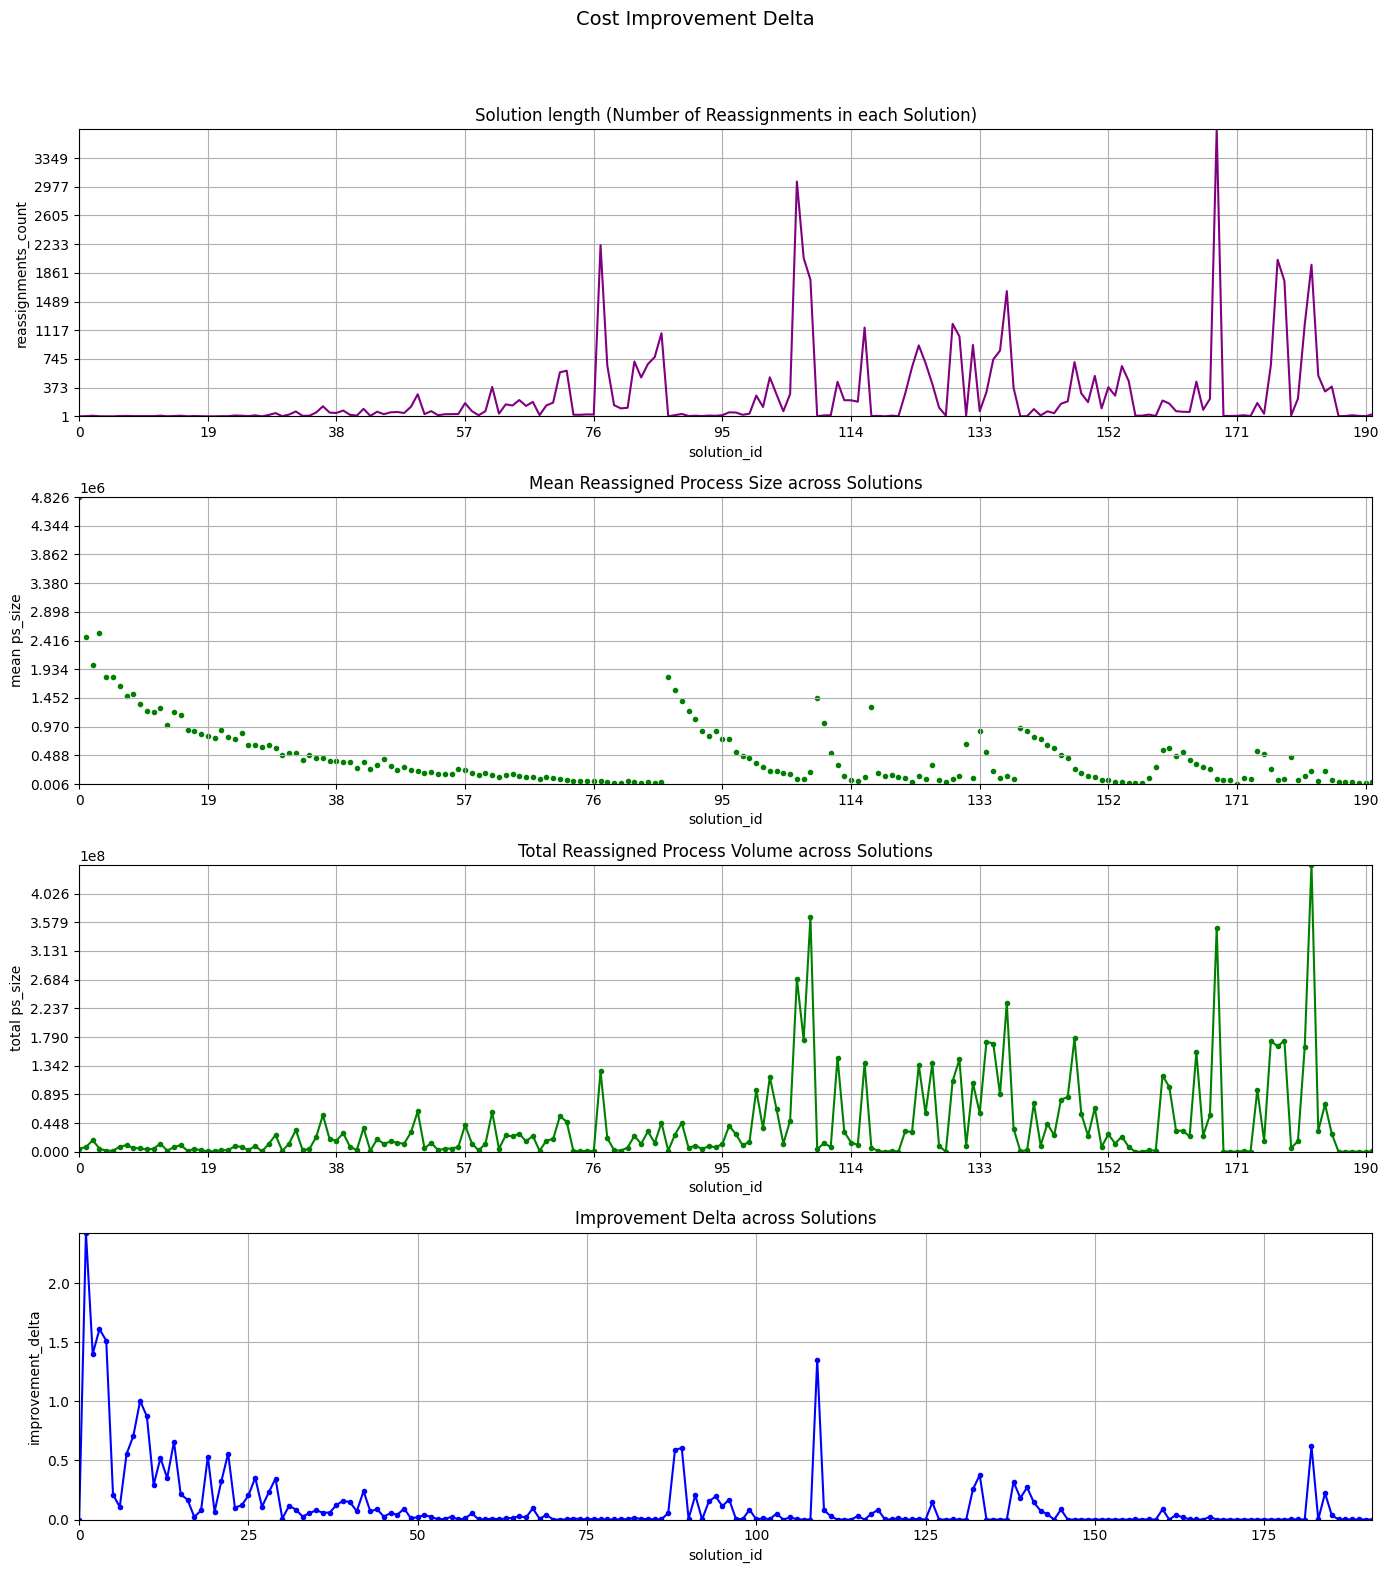

In [ ]:
solution_state_change_idx = dataset.solution_state_change_points()
solution_moves_count = dataset.transitions_reassignments_count()

transition_stats = dataset.transition_statistics()

cost_impr_deltas = dataset.solution_cost_improvement_deltas()

pltw.fig(
    ttl="Cost Improvement Delta",
    plots=[
        pltw.plot(ttl="Solution length (Number of Reassignments in each Solution)", 
                  xlbl="solution_id", 
                  ylbl="reassignments_count",
                  fticks=10,
                  y=solution_moves_count, 
                  kwargs={"color": 'purple'}),
        pltw.plot(ttl="Mean Reassigned Process Size across Solutions", 
                  xlbl="solution_id", 
                  ylbl="mean ps_size", 
                  y=transition_stats[1],
                  fticks=10,
                  kwargs={"color": 'green', "marker": '.', "ptype": 'scatter'}),
        pltw.plot(ttl="Total Reassigned Process Volume across Solutions", 
                  xlbl="solution_id", 
                  ylbl="total ps_size", 
                  y=transition_stats[0],
                  fticks=10,
                  kwargs={"color": 'green', "marker": '.'}),
        pltw.plot(ttl="Improvement Delta across Solutions", 
                  ylbl="improvement_delta",
                  xlbl="solution_id", 
                  y=cost_impr_deltas,
                  kwargs={"color": 'blue', "marker": '.',}),
    ],
)


- Frequency of reassignments per solution dramatically increases with time; <30 moves to >300 moves in 60 transitions, to >3k in 170 transitions.
- Mean process size steadily decreases over time, until reaching critical point of improvement_delta, which triggers large process reassignment, and cycle restarts, but each time to a lower maximum.
- Even with highest mean_size reassignments early in the iteration cycle, the total reassignment volume size is inversed - lowest early and exponentially growing - i.e. smaller reassignments at significantly higher rates.
- `improvement_delta` is highest in early transitions of each cycle and tapers off until critical point, triggering large process reassignment, and restarting the cycle.

# Exploration: Improvement Delta and Correlation to BPR
---

In [ ]:
solution_state_change_idx = dataset.solution_state_change_points()
cost_impr_deltas = dataset.solution_cost_improvement_deltas()

print(f"change_idx: {np.shape(solution_state_change_idx)}, impr_deltas: {np.shape(cost_impr_deltas)}")
print(f"solution_state_change_idx: {solution_state_change_idx[:5]} ... {solution_state_change_idx[-5:]}")
print(f"solution_improvement_deltas: {cost_impr_deltas[:5]} ... {cost_impr_deltas[-5:]}")

transitions_to_moves = np.full(len(dataset.move_id), np.nan, dtype=float)
print(f"transitions_to_moves shape: {np.shape(transitions_to_moves)}")
for idx, move_id in enumerate(solution_state_change_idx[:-1]):
    transitions_to_moves[move_id] = cost_impr_deltas[idx]

    if idx < 5 or idx > len(solution_state_change_idx) - 5:
        print(f"idx: {idx}, move_id: {move_id}, solution_improvement_deltas[idx]: {cost_impr_deltas[idx]}")

print(f"transitions_to_moves: {transitions_to_moves[:5]} ... {transitions_to_moves[-5:]}")


change_idx: (193,), impr_deltas: (192,)
solution_state_change_idx: [ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
solution_improvement_deltas: [0.     2.4285 1.4025 1.6112 1.514 ] ... [0.003  0.0008 0.0019 0.0006 0.0003]
transitions_to_moves shape: (51621,)
idx: 0, move_id: 0, solution_improvement_deltas[idx]: 0.0
idx: 1, move_id: 1, solution_improvement_deltas[idx]: 2.4285
idx: 2, move_id: 4, solution_improvement_deltas[idx]: 1.4025
idx: 3, move_id: 13, solution_improvement_deltas[idx]: 1.6112
idx: 4, move_id: 15, solution_improvement_deltas[idx]: 1.514
idx: 189, move_id: 51584, solution_improvement_deltas[idx]: 0.0019
idx: 190, move_id: 51591, solution_improvement_deltas[idx]: 0.0006
idx: 191, move_id: 51595, solution_improvement_deltas[idx]: 0.0003
transitions_to_moves: [0.     2.4285    nan    nan 1.4025] ... [nan nan nan nan nan]


In [ ]:
reload_modules()


In [386]:
reload_modules()
dataset = dataset_manager.ReassignmentsDataset(dataset_fraction=0.25)


Loading 206485 entries frm dataset: /home/pbiel/repos/jask/analytics/a12_new/process_reassignments.csv.
Sampled dataset to 51621 entries.
Completed loading dataset.


[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[transitions_reassignments_count] - shape: (192,)
[1 3 9 2 1] ... [ 5 15  7  4 26]
[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[solution_cost_improvement_deltas] - shape: (192,)
samples: [0.     2.4285 1.4025 1.6112 1.514 ] ... [0.003  0.0008 0.0019 0.0006 0.0003]
[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[transitions_reassignments_count] - shape: (192,)
[1 3 9 2 1] ... [ 5 15  7  4 26]
[transition_statistics] - transition 0: moves: 1, total_size=4825692, mean=4825692.0, min=4825692, max=4825692, diff=0.0
[transition_statistics] - transition 1: moves: 3, total_size=7408812, mean=

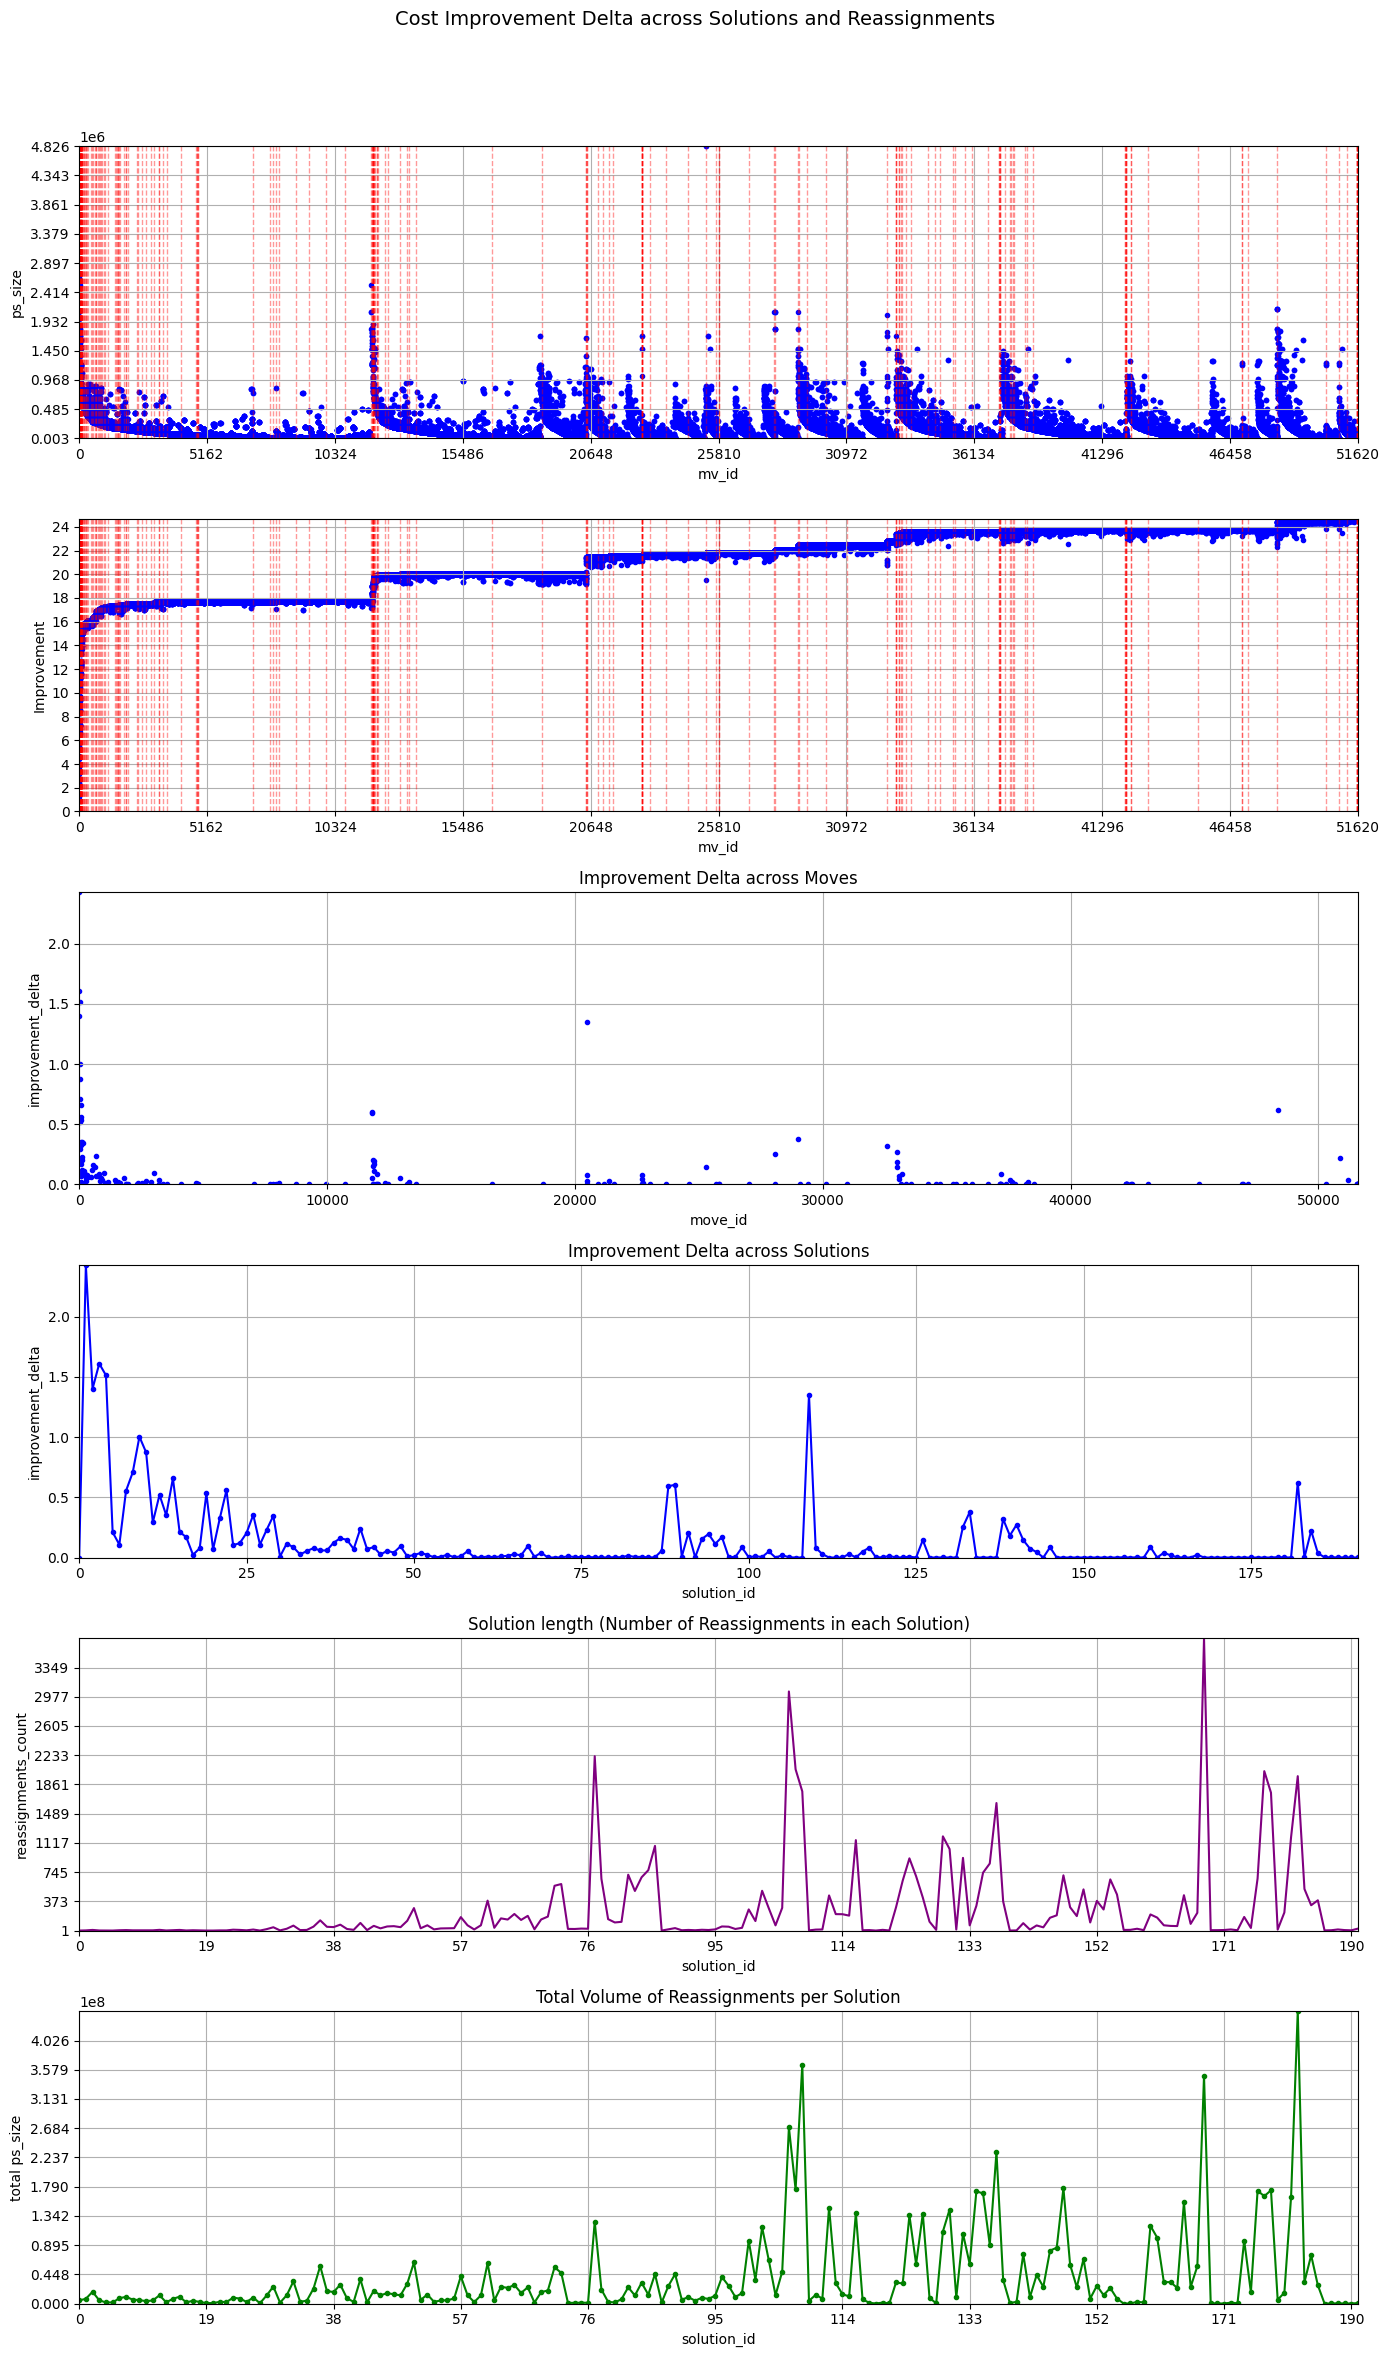

In [ ]:
solution_state_change_idx = dataset.solution_state_change_points()
solution_moves_count = dataset.transitions_reassignments_count()
cost_impr_deltas = dataset.solution_cost_improvement_deltas()
trans_size, _, _, _, _ = dataset.transition_statistics()

transitions_to_moves = np.full(len(dataset.move_id), np.nan, dtype=float)
for idx, move_id in enumerate(solution_state_change_idx[:-1]):
    transitions_to_moves[move_id] = cost_impr_deltas[idx]

pltw.fig(
    ttl="Cost Improvement Delta across Solutions and Reassignments",
    plots=[
        pltw.plot(ylbl="ps_size",
                  xlbl="mv_id",
                  y=dataset.ps_size, 
                  fticks=10,
                  vlines=solution_state_change_idx.tolist(),
                  kwargs={
                      "color": 'blue', 
                      "marker": '.', 
                      "vlines": {"color": 'red', "alpha": 0.4, "linestyle": '--'},
                      "ptype": 'scatter'}),
        pltw.plot(ylbl="Improvement", 
                  xlbl="mv_id", 
                  y=dataset.solution_cost_improvement, 
                  fticks=10,
                  vlines=solution_state_change_idx.tolist(),
                  kwargs={"color": 'blue', 
                          "marker": '.',
                          "vlines": {"color": 'red', "alpha": 0.4, "linestyle": '--'},
                          "ptype": 'scatter'}),
        pltw.plot(ttl="Improvement Delta across Moves", 
                  ylbl="improvement_delta",
                  xlbl="move_id", 
                  y=transitions_to_moves,
                  kwargs={"color": 'blue', 
                          "ptype": 'scatter',
                          "marker": '.'}),
        pltw.plot(ttl="Improvement Delta across Solutions", 
                  ylbl="improvement_delta",
                  xlbl="solution_id", 
                  y=cost_impr_deltas,
                  kwargs={"color": 'blue', 
                          "marker": '.',}),
        pltw.plot(ttl="Solution length (Number of Reassignments in each Solution)", 
                  xlbl="solution_id", 
                  ylbl="reassignments_count",
                  fticks=10,
                  y=solution_moves_count, 
                  kwargs={"color": 'purple'}),
        pltw.plot(ttl="Total Volume of Reassignments per Solution", 
                  xlbl="solution_id", 
                  ylbl="total ps_size", 
                  y=trans_size,
                  fticks=10,
                  kwargs={"color": 'green', "marker": '.'}),
])


- Investigation into cost improvement deltas at smaller scale

[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[solution_cost_improvement_deltas] - shape: (192,)
samples: [0.     2.4285 1.4025 1.6112 1.514 ] ... [0.003  0.0008 0.0019 0.0006 0.0003]
cost_impr_deltas_seg1: [0.0207 0.0375 0.0234 0.0011 0.0061 0.024  0.0009 0.0103 0.0522 0.0015
 0.0016 0.0078 0.0028 0.0092 0.0144 0.0278 0.0179 0.0954 0.0064 0.0399]
cost_impr_deltas_seg2: [0.0006 0.0001 0.0018 0.0091 0.0045 0.0029 0.0039 0.0018 0.0018 0.001
 0.0029 0.0023 0.0152 0.0043 0.006  0.0011 0.0017 0.0565]


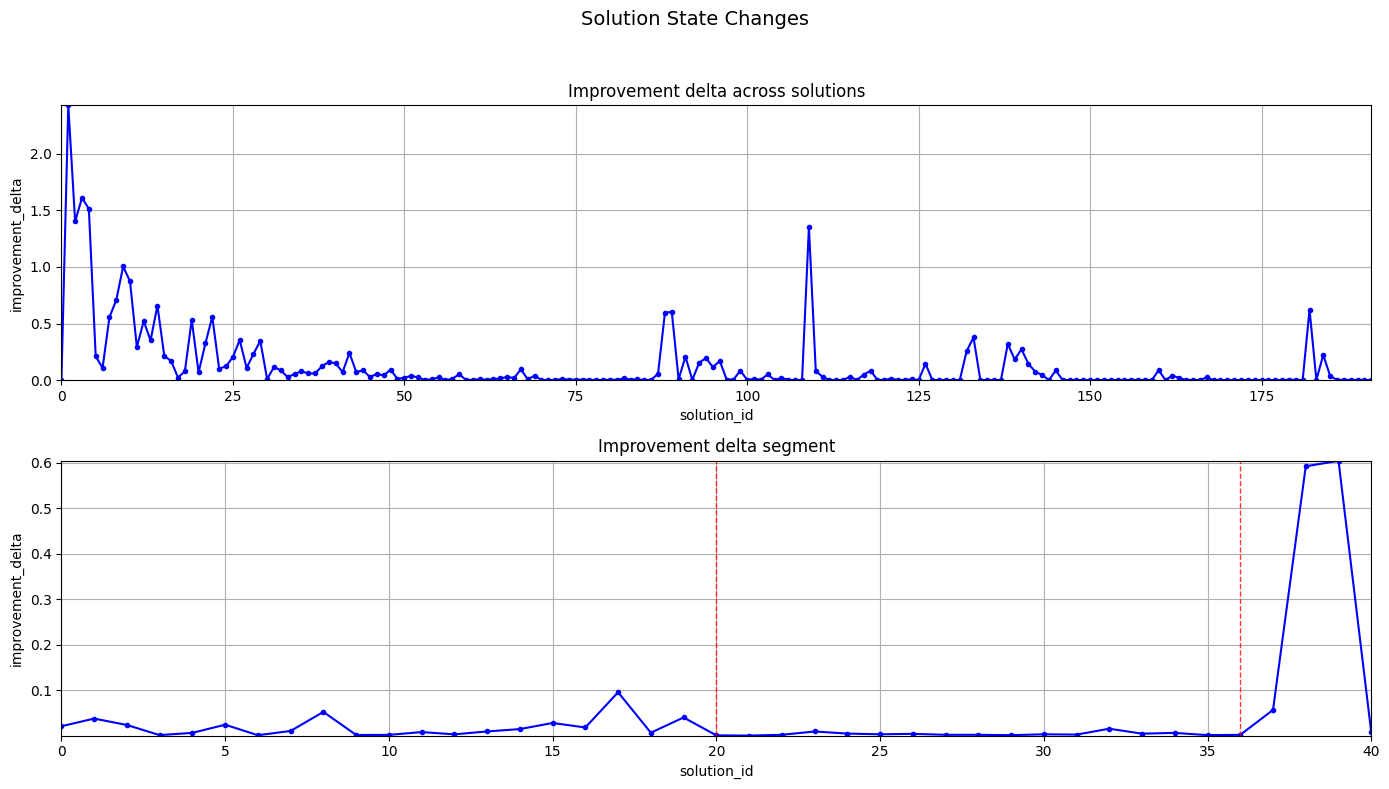

In [ ]:
cost_impr_deltas = dataset.solution_cost_improvement_deltas()

cost_impr_deltas_base_segment = cost_impr_deltas[50:9]
cost_impr_deltas_seg1 = cost_impr_deltas_base_segment[0:20]
cost_impr_deltas_seg2 = cost_impr_deltas_base_segment[20:38]

print(f"cost_impr_deltas_seg1: {cost_impr_deltas_seg1}")
print(f"cost_impr_deltas_seg2: {cost_impr_deltas_seg2}")

pltw.fig(
    ttl="Solution State Changes",
    plots=[
        pltw.plot(ttl="Improvement delta across solutions", 
                  ylbl="improvement_delta",
                  xlbl="solution_id", 
                  y=cost_impr_deltas,
                  kwargs={"color": 'blue', 
                          "marker": '.',}),
        pltw.plot(ttl="Improvement delta segment", 
                  ylbl="improvement_delta",
                  xlbl="solution_id",
                  y=cost_impr_deltas_base_segment,
                  vlines=[20, 36],
                  kwargs={"color": 'blue', 
                          "marker": '.',}),
])


No apparent threshold trigger, the values coming up to the large spike `[... 0.0043 0.006  0.0011 0.0017 0.0565]` are larger than deltas from previous segment `[... 0.0015 0.0016 0.0078 0.0028 0.0092 ...]` which did not trigger a spike.

- Investigation into # Reassignments vs. Improvement deltas

In [ ]:
reload_modules()


[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[transitions_reassignments_count] - shape: (192,)
[1 3 9 2 1] ... [ 5 15  7  4 26]
[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[solution_state_change_points] - shape: (193,)
[ 0  1  4 13 15] ... [51569 51584 51591 51595 51621]
[transitions_reassignments_count] - shape: (192,)
[1 3 9 2 1] ... [ 5 15  7  4 26]
[transition_statistics] - transition 0: moves: 1, total_size=4825692, mean=4825692.0, min=4825692, max=4825692, diff=0.0
[transition_statistics] - transition 1: moves: 3, total_size=7408812, mean=2469604.0, min=2094658, max=2657077, diff=562419.0
[transition_statistics] - transition 2: moves: 9, total_size=18112241, mean=2012471.2222222222, min=1754515, max=2698809, diff=944294.0
[transition_statistics] - transition 3: moves: 2, t

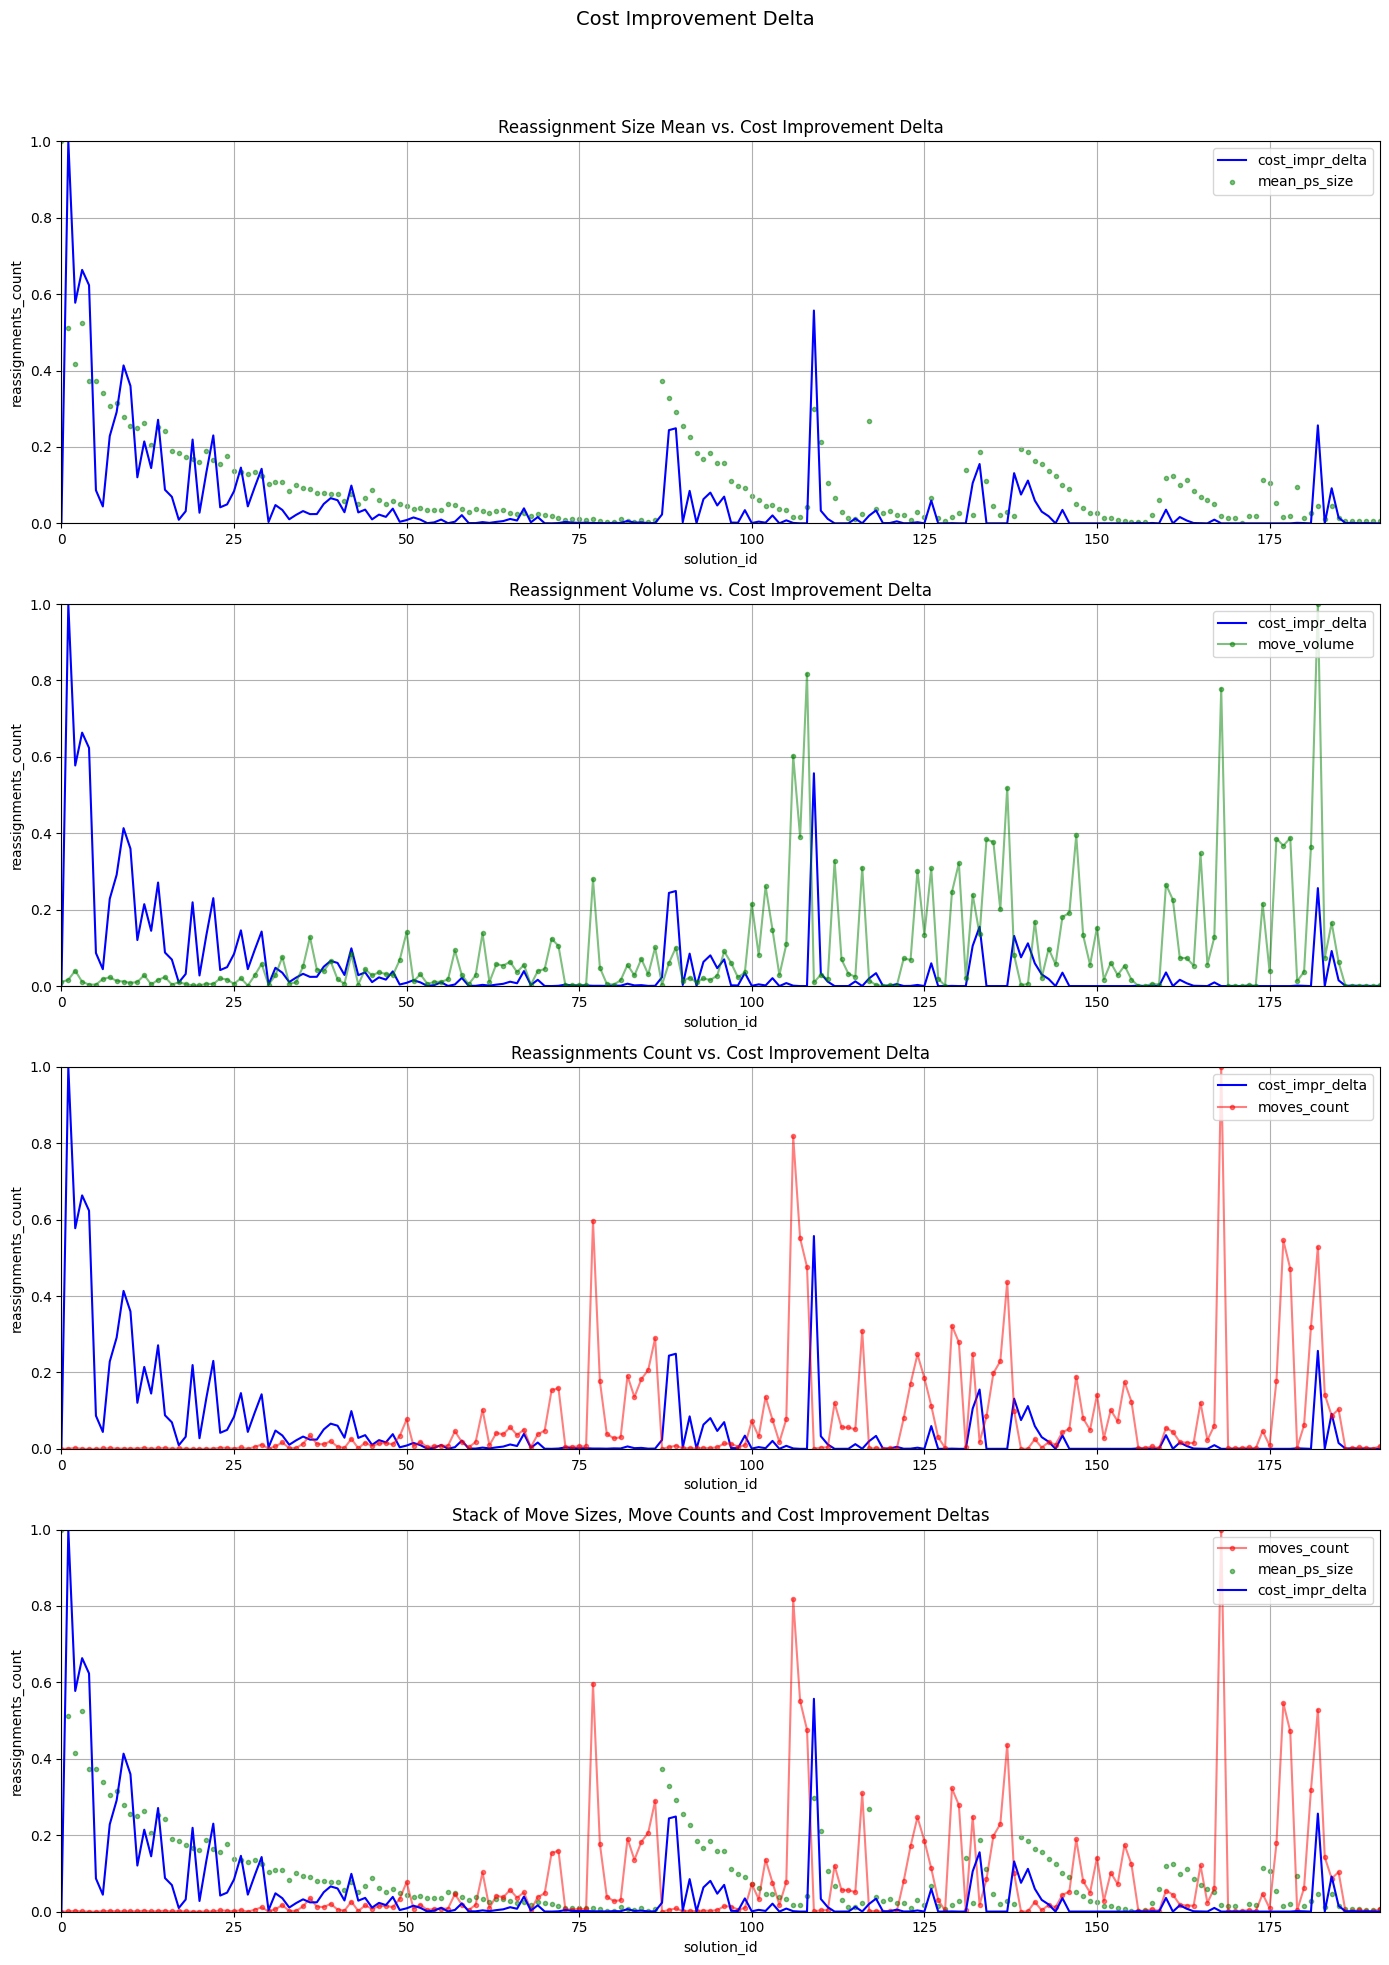

In [ ]:
# ps_size_mean vs. moves_count vs. cost_impr_delta

solution_state_change_idx = dataset.solution_state_change_points()

solution_moves_count = dataset.transitions_reassignments_count()
norm_sol_moves_count = statistical_utils.normalize(solution_moves_count)

transition_stats = dataset.transition_statistics()

sol_move_volume = transition_stats[0]
norm_sol_move_volume = statistical_utils.normalize(sol_move_volume)

solution_move_size_mean = transition_stats[1]
norm_sol_move_size_mean = statistical_utils.normalize(solution_move_size_mean)

cost_impr_deltas = dataset.solution_cost_improvement_deltas()
norm_cost_impr_deltas = statistical_utils.normalize(cost_impr_deltas)

pltw.fig(
    ttl="Cost Improvement Delta",
    plt_height=5,
    plots=[
        pltw.plot(ttl="Reassignment Size Mean vs. Cost Improvement Delta", 
                  xlbl="solution_id", 
                  ylbl="reassignments_count",
                  y=[norm_cost_impr_deltas, norm_sol_move_size_mean], 
                  kwargs=[
                      {"color": 'blue', "label": 'cost_impr_delta'},
                      {"color": 'green', "marker": '.', "label": 'mean_ps_size', "ptype": 'scatter', "alpha": 0.5},
                      ]),
        pltw.plot(ttl="Reassignment Volume vs. Cost Improvement Delta", 
                  xlbl="solution_id", 
                  ylbl="reassignments_count",
                  y=[norm_cost_impr_deltas, norm_sol_move_volume], 
                  kwargs=[
                      {"color": 'blue', "label": 'cost_impr_delta'},
                      {"color": 'green', "marker": '.', "label": 'move_volume', "alpha": 0.5},
                      ]),
        pltw.plot(ttl="Reassignments Count vs. Cost Improvement Delta", 
                  xlbl="solution_id", 
                  ylbl="reassignments_count",
                  y=[norm_cost_impr_deltas, norm_sol_moves_count], 
                  kwargs=[
                      {"color": 'blue', "label": 'cost_impr_delta'},
                      {"color": 'red', "marker": '.', "label": 'moves_count', "alpha": 0.5},
                      ]),
        pltw.plot(ttl="Stack of Move Sizes, Move Counts and Cost Improvement Deltas", 
                  xlbl="solution_id", 
                  ylbl="reassignments_count",
                  y=[norm_sol_moves_count, norm_sol_move_size_mean, norm_cost_impr_deltas], 
                  kwargs=[
                      {"color": 'red', "marker": '.', "label": 'moves_count', "alpha": 0.5},
                      {"color": 'green', "marker": '.', "label": 'mean_ps_size', "ptype": 'scatter', "alpha": 0.5},
                      {"color": 'blue', "label": 'cost_impr_delta'}
                      ]),
    ],
)


# Exploration: Lifecycle on solution basis
---

# 2 / Reassignments

In [18]:
dataset = ReassignmentsDataset(dataset_fraction=0.25)


[__init__] - Loading 206485 entries frm dataset: /home/pbiel/repos/jask/analytics/a12_new/process_reassignments.csv.
[__init__] - Sampled dataset to 51621 entries.
[__init__] - Completed loading dataset.


Focusing on the following plots, goal is to determine:
- What is happening at the jumps - some critical limit reached such as too small improvement %?
- Is there a downward trend of `ps_size` over time? 

In [41]:
def get_process_moves(process_id, move_ids, process_ids, src_machines, dest_machines, unique=False, print_results=False):
    """
    Get all moves for a given process ID.
    If unique is True, return unique source and destination machines.
    """
    mask = (process_ids == process_id)

    move_id_matches = move_ids[mask]
    src_machine_matches = src_machines[mask]
    dest_machine_matches = dest_machines[mask]

    if unique:
        # Preserve first-order seen while removing duplicates
        _, src_machine_idx = np.unique(src_machine_matches, return_index=True)
        _, dest_machine_idx = np.unique(dest_machine_matches, return_index=True)
        
        move_id_matches = move_id_matches[np.sort(np.concatenate((src_machine_idx, dest_machine_idx)))]
        src_machine_matches = src_machine_matches[np.sort(src_machine_idx)]
        dest_machine_matches = dest_machine_matches[np.sort(dest_machine_idx)]
    
    log(f"Returning {len(move_id_matches)} results for process {process_id}.")
    if print_results:
        for i in range(len(move_id_matches)):
            process_id, move_id, src_machine, dest_machine = process_id, move_id_matches[i], src_machine_matches[i], dest_machine_matches[i]
            log(f"Process: {process_id}, Move ID: {move_id}, Source Machine: {src_machine}, Destination Machine: {dest_machine}")

    return move_id_matches, src_machine_matches, dest_machine_matches


In [ ]:
def get_machine_resource_usage(machine_id, src_machines, dest_machines, src_machine_usages, dest_machine_usages, show_results=False):
    """
    Returns list where each element is the usage snapshot of the machine at the time of the move.
    """
    matches_as_src_machine  = np.where(src_machines == machine_id)[0]
    matches_as_dest_machine = np.where(dest_machines == machine_id)[0]

    machine_usages = []

    for idx in matches_as_src_machine:
        machine_usages.append(src_machine_usages[idx])

    for idx in matches_as_dest_machine:
        machine_usages.append(dest_machine_usages[idx])

    log(f"Returning {len(machine_usages)} results for machine {machine_id}.")
    if show_results:
        for i in range(min(len(machine_usages), 10)):
            log(f"Machine: {machine_id}, Usage: {machine_usages[i]}")

    return machine_usages


## 2 / Reassignments / Process Size

In [ ]:
tps_idx, tps_vals = npw.n_largest(dataset.ps_size, n=20)
print(f"Top 20 largest processes:")
for solution_idx, val in zip(tps_idx, tps_vals):
    print(f"Move ID: {dataset.move_id[solution_idx]}, Process ID: {dataset.ps_id[solution_idx]}, Size: {val}")


Top 20 largest processes:
Move ID: 1, Process ID: 138, Size: 4825692
Move ID: 25285, Process ID: 138, Size: 4825692
Move ID: 25286, Process ID: 138, Size: 4825692
Move ID: 7, Process ID: 55, Size: 2698809
Move ID: 8, Process ID: 55, Size: 2698809
Move ID: 2, Process ID: 759, Size: 2657077
Move ID: 3, Process ID: 759, Size: 2657077
Move ID: 11799, Process ID: 54, Size: 2536720
Move ID: 14, Process ID: 54, Size: 2536720
Move ID: 15, Process ID: 54, Size: 2536720
Move ID: 48359, Process ID: 810, Size: 2136827
Move ID: 48360, Process ID: 810, Size: 2136827
Move ID: 48361, Process ID: 763, Size: 2133318
Move ID: 48362, Process ID: 763, Size: 2133318
Move ID: 28083, Process ID: 780, Size: 2094658
Move ID: 4, Process ID: 780, Size: 2094658
Move ID: 11798, Process ID: 780, Size: 2094658
Move ID: 29006, Process ID: 780, Size: 2094658
Move ID: 28069, Process ID: 780, Size: 2094658
Move ID: 28068, Process ID: 780, Size: 2094658


In [ ]:
process_id = 138
move_ids, src_machines, dest_machines = get_process_moves(
    process_id, 
    dataset.move_id, 
    dataset.ps_id, 
    dataset.src_machine_id, 
    dataset.dest_machine_id, 
    print_results=True
    )


[get_process_moves] - Returning 3 results for process 138.
[get_process_moves] - Process: 138, Move ID: 1, Source Machine: 53, Destination Machine: 76
[get_process_moves] - Process: 138, Move ID: 25285, Source Machine: 76, Destination Machine: 53
[get_process_moves] - Process: 138, Move ID: 25286, Source Machine: 53, Destination Machine: 76


In [43]:
process_id = 55
move_ids, src_machines, dest_machines = get_process_moves(
    process_id, 
    dataset.move_id, 
    dataset.ps_id, 
    dataset.src_machine_id, 
    dataset.dest_machine_id, 
    print_results=True
    )


[get_process_moves] - Returning 2 results for process 55.
[get_process_moves] - Process: 55, Move ID: 7, Source Machine: 96, Destination Machine: 71
[get_process_moves] - Process: 55, Move ID: 8, Source Machine: 71, Destination Machine: 96


In [ ]:
process_id = 780
move_ids, src_machines, dest_machines = get_process_moves(
    process_id, 
    dataset.move_id, 
    dataset.ps_id, 
    dataset.src_machine_id, 
    dataset.dest_machine_id, 
    print_results=True
    )


[get_process_moves] - Returning 8 results for process 780.
[get_process_moves] - Process: 780, Move ID: 4, Source Machine: 47, Destination Machine: 60
[get_process_moves] - Process: 780, Move ID: 11797, Source Machine: 60, Destination Machine: 47
[get_process_moves] - Process: 780, Move ID: 11798, Source Machine: 47, Destination Machine: 60
[get_process_moves] - Process: 780, Move ID: 28068, Source Machine: 60, Destination Machine: 47
[get_process_moves] - Process: 780, Move ID: 28069, Source Machine: 47, Destination Machine: 60
[get_process_moves] - Process: 780, Move ID: 28082, Source Machine: 60, Destination Machine: 47
[get_process_moves] - Process: 780, Move ID: 28083, Source Machine: 47, Destination Machine: 60
[get_process_moves] - Process: 780, Move ID: 29006, Source Machine: 60, Destination Machine: 47


## 2 / Reassignments / Machine Resources

In [50]:
machine_usage = get_machine_resource_usage(
    machine_id=53,
    src_machines=dataset.src_machine_id,
    dest_machines=dataset.dest_machine_id,
    src_machine_usages=dataset.src_machine_usage,
    dest_machine_usages=dataset.dest_machine_usage,
    show_results=True)


[get_machine_resource_usage] - Returning 280 results for machine 53.
[get_machine_resource_usage] - Machine: 53, Usage: 18795805
[get_machine_resource_usage] - Machine: 53, Usage: 13970113
[get_machine_resource_usage] - Machine: 53, Usage: 13970113
[get_machine_resource_usage] - Machine: 53, Usage: 13970113
[get_machine_resource_usage] - Machine: 53, Usage: 13156310
[get_machine_resource_usage] - Machine: 53, Usage: 13156310
[get_machine_resource_usage] - Machine: 53, Usage: 13156310
[get_machine_resource_usage] - Machine: 53, Usage: 13156310
[get_machine_resource_usage] - Machine: 53, Usage: 13228300
[get_machine_resource_usage] - Machine: 53, Usage: 13228300
